# Analyzing Demographic Factors in relation to Obesity Rates in the U.S. -
Final Report



Github Link: https://github.com/ShimraHazmi/CS418Project

In [37]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import pickle
import numpy as np
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Project introduction

Our analysis aims to explore obesity rates and how they vary across different demographic groups, including age, sex, location, and education levels. We hypothesize that certain demographics may exhibit higher obesity rates due to various socio-economic and environmental factors associated with those groups. This hypothesis will be tested through comprehensive visualizations that highlight the relationships between obesity rates and these demographics.

For this analysis, we have utilized the USDA Food Environment Atlas Dataset, which provides a wealth of information on food environment factors and community characteristics related to food consumption behaviors. The dataset encompasses over 280 variables, offering a rich foundation for identifying patterns and trends associated with obesity rates. We also used the Behavioral Risk Factor Surveillance System (BRFSS) dataset which contains data about obesity rate and other demographic factors across multiple years, by state.

Our first step will be to clean and preprocess the dataset to ensure the quality of the data and prepare it for analysis. Once the data is refined, we will generate a series of visualizations to help us uncover insights about the relationships between obesity and the various demographic factors.

Based on these findings, our ultimate goal is to provide actionable recommendations aimed at improving obesity rates across the different demographics. These recommendations will be informed by the results of our visualizations, which will help us identify key factors that contribute to obesity and suggest targeted interventions to address these challenges.

## Changes Made Since Proposal (FATIMAH)

Our overall scope has mostly stayed the same since the check in proposal slides. Initially, we considered expanding our analysis to include global datasets, but in the end, we chose to focus mainly on U.S. based data from the two datasets we mentioned in the inital proposal. This helped us to stay focused and go deeper into the analysis rather than broadening the scope.
We used our initial hypothesis as a guide of what data to focus on: If certain demographic and lifestyle factors, such as age, gender, income level, race, and availability of recreational centers are associated with higher obesity rates, then individuals from specific demographics will have a higher likelihood of obesity compared to others.

We created five different visualizations and hypothesis from our main one to help us explore our original hypothesis more in depth:
1) States with higher average participation in food assistance programs will have higher average obesity rates.
2) Those who have obtained a higher education will have lower rates of obesity.
3) There will not be a significant difference in obesity rates between females and males.
4) Lower income groups will have higher obesity rates.
5) Obesity rates depend on access to a recreational facility like a gym.

Overall, our scope has not changed much since our slides from last time and we are on track to creating our final report with multiple visualizations and statistical insights as planned. As we mentioned in the slides, we used tools like Pandas, NumPy, Matplotlib, and Seaborn to analyze the data and visualize the trends across various demographics.

## Data (KYLA, SHIMRA)

#### Preparing the USDA Food Access Research Atlas dataset
Kyla - The USDA Food Atlas dataset contained two data files, one with core data avriables and one with supplemental information. Our team focused on using the coredata variables related to demographic statistics, so we filtered the data by those core variables. Then, I used the .info() function fron the Pandas python library to view a summary of the dataframe values. The number of non-null values matched the total number of columns for each variable, so filtering the data to exclude null values was not needed for this dataset. Additionally, if using the BRFSS dataset and the Food Atlas dataset in one visualization or analysis, we took additional steps to aggregate the Food Atlas dataset variable values to convert the data from county level to state level. This as done so that the Food Atlas and the BRFSS data can be joined by state name.   <br>

#### Preparing the BRFSS dataset
Shimra - Initially looking at the dataset, I noticed that there were a lot of columns with repeated information. Since this may interfere later on when we visualize our data, I decided to drop those extra columns. These were the stratification columns. Then, I melted the dataframe so that is in long form
and easier to analyze. This helped me decide which columns to keep and which to remove. I did not remove any rows with empty data because it looks like every row has at least one missing value. When I dropped the rows with empty values, it dropped all rows. In the end, I decided to retain the rows because they can hold other important types of information, and also because we can always drop the missing values later on if we don't need it.<br>

### BRFSS Dataset

In [38]:
df = pd.read_csv('/content/drive/MyDrive/418ObesityAnalysis/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')
df.head()



,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,2 or more races,RACE,RACE2PLUS
1,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,Other,RACE,RACEOTH
2,2011,2011,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,2011.0,Value,...,"(64.845079957001, -147.722059036)",PA,PA1,Q044,VALUE,2,Sex,Female,SEX,FEMALE
3,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Age (years),35 - 44,AGEYR,AGEYR3544
4,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q037,VALUE,2,Income,"$15,000 - $24,999",INC,INC1525


In [39]:
df = df.drop(columns = ["StratificationCategory1", "Stratification1", "StratificationCategoryId1"])

df2 = df

# Define id_vars (columns to keep)
id_vars = ["YearStart", "YearEnd", "LocationAbbr", "LocationDesc", "Class", "Topic",
           "Question", "QuestionID", "Data_Value", "Data_Value_Alt", "Data_Value_Unit", "Data_Value_Type", "Data_Value_Footnote", "Low_Confidence_Limit", "High_Confidence_Limit ", "Sample_Size", "Total", "Age(years)", "GeoLocation", "Sex", "Education", "Income", "Race/Ethnicity", "StratificationID1"]

# Melt all other columns
df_long = df.melt(id_vars=id_vars, var_name="Variable", value_name="Value")


# Display the transformed dataframe
df_long.head()


# df.columns

,YearStart,YearEnd,LocationAbbr,LocationDesc,Class,Topic,Question,QuestionID,Data_Value,Data_Value_Alt,...,Total,Age(years),GeoLocation,Sex,Education,Income,Race/Ethnicity,StratificationID1,Variable,Value
0,2011,2011,AK,Alaska,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Q036,23.3,23.3,...,NaN,NaN,"(64.845079957001, -147.722059036)",NaN,NaN,NaN,2 or more races,RACE2PLUS,Datasource,BRFSS
1,2011,2011,AK,Alaska,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Q036,35.5,35.5,...,NaN,NaN,"(64.845079957001, -147.722059036)",NaN,NaN,NaN,Other,RACEOTH,Datasource,BRFSS
2,2011,2011,AK,Alaska,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,Q044,21.7,21.7,...,NaN,NaN,"(64.845079957001, -147.722059036)",Female,NaN,NaN,NaN,FEMALE,Datasource,BRFSS
3,2011,2011,AK,Alaska,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Q036,29.5,29.5,...,NaN,35 - 44,"(64.845079957001, -147.722059036)",NaN,NaN,NaN,NaN,AGEYR3544,Datasource,BRFSS
4,2011,2011,AK,Alaska,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Q037,33.5,33.5,...,NaN,NaN,"(64.845079957001, -147.722059036)",NaN,NaN,"$15,000 - $24,999",NaN,INC1525,Datasource,BRFSS


### USDA Food Environment Atlas Dataset

In [40]:
usda_df = pd.read_csv('/content/drive/MyDrive/418ObesityAnalysis/FoodEnvironmentAtlas/StateAndCountyData.csv')
variable_df = pd.read_csv('/content/drive/MyDrive/418ObesityAnalysis/FoodEnvironmentAtlas/VariableList.csv')

# Filter data to only include info from the variablelist csv file - core information
main_df = usda_df[usda_df['Variable_Code'].isin(variable_df['Variable_Code'].unique().tolist())]
print(main_df)

# Check if data is clean
print(main_df.info())

         FIPS State   County          Variable_Code         Value
0        1001    AL  Autauga          LACCESS_POP10  18428.439690
1        1001    AL  Autauga          LACCESS_POP15  17496.693040
2        1001    AL  Autauga  PCH_LACCESS_POP_10_15     -5.056026
3        1001    AL  Autauga      PCT_LACCESS_POP10     33.769657
4        1001    AL  Autauga      PCT_LACCESS_POP15     32.062255
...       ...   ...      ...                    ...           ...
822385  56045    WY   Weston               PERPOV10      0.000000
822386  56045    WY   Weston         CHILDPOVRATE15     13.100000
822387  56045    WY   Weston           PERCHLDPOV10      0.000000
822388  56045    WY   Weston                METRO13      0.000000
822389  56045    WY   Weston              POPLOSS10      0.000000

[819275 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
Index: 819275 entries, 0 to 822389
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         -----------

## Exploratory Data Analysis

Explain what your data looks like (visualizations are often
better). Include any interesting issues or preliminary
conclusions you have about your data:

After visualizing the data, we found that it was in wide format which wouldn't make it ideal to work with, so we converted it to long-form so that it's easier to retrieve information and manipulate it directly. Next, we analyzed the columns and rows to understand what sort of data and the types of data we are working with. In the BRFSS dataframe, we found that there were columns with repeated information so we decided to drop them. We also found multiple columns with various types of data and this would make it difficult to analyze the data using visualization due to the varying types. In the following code cells, we modified the types so that it fits better with what we are trying to do. For example: we used encoding to transform the sex column into binary data.

### Overall spread of obesity rates

It looks like there are about 17.5k groups in the dataset where the obesity rate falls within 30-40%.


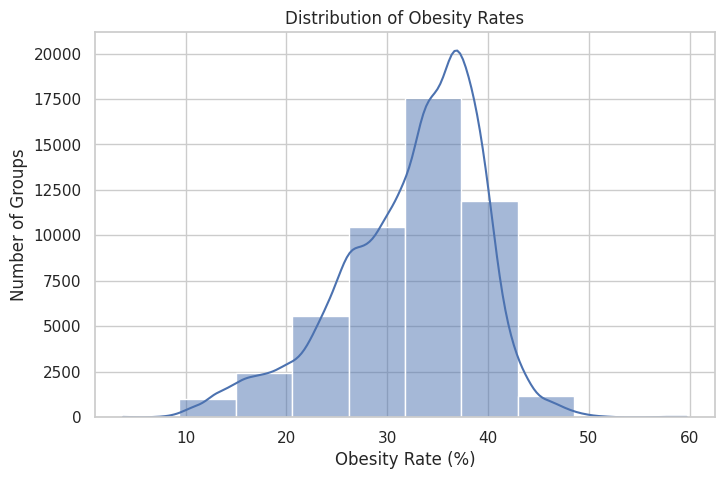

In [41]:
cleaned_d2 = df_long[
    (df_long['Age(years)'].notna()) & # Get rid of missing data in age(years) column
    (df_long['Class'] == 'Obesity / Weight Status') & # Only have the obesity data in the class column
    (df_long['Data_Value'].notna()) # Remove missing values in the data_value column
][['Age(years)', 'Data_Value']].reset_index(drop=True)

plt.figure(figsize=(8, 5))
sns.histplot(cleaned_d2['Data_Value'], bins = 10,kde = True)
plt.title("Distribution of Obesity Rates")
plt.xlabel("Obesity Rate (%)")
plt.ylabel("Number of Groups")
plt.show()

### MEDIAN HOUSEHOLD INCOME LEVEL- should we explore in detail how income level affect obesity rates?
We first wanted to see if income would have any sort of correlation with obesity rate so we decided to look at the median household income by state compared to the obesity rate by state, and we saw that there was definitely a negative correlation between the two variables.. Because of this, we decided to explore this more by looking at income levels and education levels and how these demographics specifically impact obesity rates.


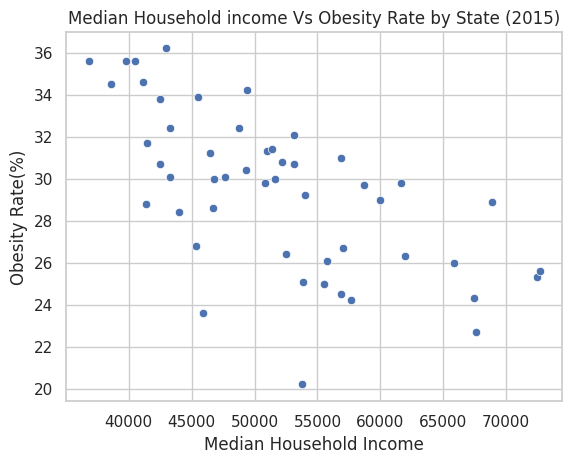

In [42]:

#filter the obesity data set to look at the percent of adults who had obesite in the year 2016
obesity_df = df_long[
    (df_long['YearStart'] == 2015) &
    (df_long['Question'] == 'Percent of adults aged 18 years and older who have obesity') &
    (df_long['StratificationID1'].str.strip() == "OVERALL") &
    (df_long['Total'] == 'Total') &
    (df_long['Value'] == 'BRFSS')
].reset_index(drop=True)

# exclude the values of other US territories, focusing only on the states, and update the data frame with teh obesity data
excluded = ['National', 'District of Columbia', 'Guam', 'Puerto Rico', 'Virgin Islands']
obesity_df = obesity_df[~obesity_df['LocationDesc'].isin(excluded)].reset_index(drop=True)
obesity_df = obesity_df[['YearStart', 'LocationAbbr', 'LocationDesc', 'Data_Value']]
obesity_df.rename(columns={'Data_Value': 'Obesity_Rate'}, inplace=True)

# look at the data only for the median household income in 2015 and group by states for the dataset
rf_df = main_df[main_df['Variable_Code'] == "MEDHHINC15"]
rf_state = rf_df.groupby(['State', 'Variable_Code'])['Value'].mean().reset_index()
rf_state = rf_state.pivot(index='State', columns='Variable_Code', values='Value').reset_index()
rf_state = rf_state[rf_state['State'] != 'DC'].reset_index(drop=True)


#merge bothe the obesity data and make sure all of teh columns that we are left with are numeric
rfacility_df = obesity_df.merge(rf_state, left_on="LocationAbbr", right_on="State", how="inner")

#make a scatter plot with states as the dots
sns.scatterplot(x="MEDHHINC15", y="Obesity_Rate", data=rfacility_df)
plt.title("Median Household income Vs Obesity Rate by State (2015)")
plt.xlabel("Median Household Income")
plt.ylabel("Obesity Rate(%)")
plt.show()




Poverty rates vs obesity rate by state explanation:


We also decided to look at poverty rates by state compared to obesity rates by state. We did this because we wanted to see if we should look more into aspects related to poverty such as snap usage, wics usage, etc. This graph shows that there is a positive correlation between the poverty rates of states and the obesity rate of states. Because of this, we thought it would be valuable to examine this further by looking at snap participants, wics participants, etc.


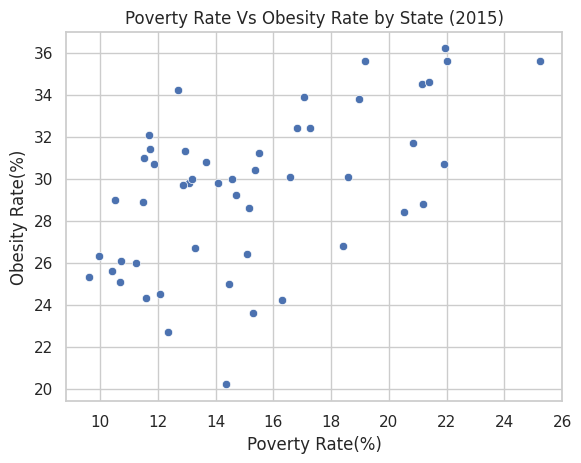

In [43]:

#filter the obesity data set to look at the percent of adults who had obesite in the year 2016
obesity_df = df_long[
    (df_long['YearStart'] == 2015) &
    (df_long['Question'] == 'Percent of adults aged 18 years and older who have obesity') &
    (df_long['StratificationID1'].str.strip() == "OVERALL") &
    (df_long['Total'] == 'Total') &
    (df_long['Value'] == 'BRFSS')
].reset_index(drop=True)

# exclude the values of other US territories, focusing only on the states, and update the data frame with teh obesity data
excluded = ['National', 'District of Columbia', 'Guam', 'Puerto Rico', 'Virgin Islands']
obesity_df = obesity_df[~obesity_df['LocationDesc'].isin(excluded)].reset_index(drop=True)
obesity_df = obesity_df[['YearStart', 'LocationAbbr', 'LocationDesc', 'Data_Value']]
obesity_df.rename(columns={'Data_Value': 'Obesity_Rate'}, inplace=True)

# look at the data only for the poverty rate in 2015 and group by the state data from counties
rf_df = main_df[main_df['Variable_Code'] == "POVRATE15"]
rf_state = rf_df.groupby(['State', 'Variable_Code'])['Value'].mean().reset_index()
rf_state = rf_state.pivot(index='State', columns='Variable_Code', values='Value').reset_index()
rf_state = rf_state[rf_state['State'] != 'DC'].reset_index(drop=True)

#merge bothe the obesity data and make sure all of teh columns that we are left with are numeric
rfacility_df = obesity_df.merge(rf_state, left_on="LocationAbbr", right_on="State", how="inner")

#make a scatter plot with states as the dots
sns.scatterplot(x="POVRATE15", y="Obesity_Rate", data=rfacility_df)
plt.title("Poverty Rate Vs Obesity Rate by State (2015)")
plt.xlabel("Poverty Rate(%)")
plt.ylabel("Obesity Rate(%)")
plt.show()

Interactive Graph explanation:
We also wanted a general look at how obesity rates varied from state to state before we began. We decided to create a graph of the United States which shows the obesity rate as a sort of heat map with the darkest reds showing the highest obesity rates for the year 2012.


In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as intx

#filter the obesity data set to look at the percent of adults who had obesite in the year 2016
obesity_df = df_long[
    (df_long['YearStart'] == 2012) &
    (df_long['Question'] == 'Percent of adults aged 18 years and older who have obesity') &
    (df_long['StratificationID1'].str.strip() == "OVERALL") &
    (df_long['Total'] == 'Total') &
    (df_long['Value'] == 'BRFSS')
].reset_index(drop=True)

# Exclude territories and rename value column
excluded = ['National', 'District of Columbia', 'Guam', 'Puerto Rico', 'Virgin Islands']
obesity_df = obesity_df[~obesity_df['LocationDesc'].isin(excluded)].reset_index(drop=True)
obesity_df = obesity_df[['YearStart', 'LocationAbbr', 'LocationDesc', 'Data_Value']]
obesity_df.rename(columns={'Data_Value': 'Obesity_Rate'}, inplace=True)

# Merge both obesity and agritourism datasets
allstate_df = obesity_df.merge(rf_state, left_on="LocationAbbr", right_on="State", how="inner")


#make an interactive map with all of the states
stateFigure = intx.choropleth(
    allstate_df,
    locations="State",
    color="Obesity_Rate",
    color_continuous_scale="Viridis",
    scope="usa",
    labels={'Obesity_Rate': 'Obesity Rate(%)'},
    locationmode="USA-states",
    title="Obesity Rate by State (2012)"
)

stateFigure.show()

## Data Visualizations

At least five visualizations that shows an interesting hypothesis, along with an
explanation about why you thought this was an interesting hypothesis to
Investigate. Write the name of the member(s) who is responsible for each of them while
explaining it

#### Visualization 1: Obesity Rate vs Food Assistance Program Participation
*By Kyla Gonzalez*<br><br>

**Hypothesis**: States with higher average participation in food assistance programs will have higher average obesity rates.

**Discussion**: This topic is relevant because in the media there has been discussion about whether food assistance programs should be restricted to exclude the purchase of junk foods in order to improve the health of low income households. <br>

**Visualization**: This visualization takes data per state related to the participation in 3 food assistance programs: SNAP, WIC, and the National School Lunch Program in 2017, and compares them to the obesity rate in 2017. <br>

The findings of this visualization show a correlation between high obesity rate and high food assistance participation, as represented by the heatmap below. More specifically, there is a higher correlation between obesity rate and participation in the national school lunch program than the other programs.
<br>

This data could support the argument to change food assistance programs to restrict the type of food people are able to purchase, since it could potentially lower the average obesity rate in the U.S. However, more analysis would need to be done to determine wether other factors could have a stronger influence on the average obesity rate per state, that could deem this restriction unnescessary.

    YearStart LocationAbbr    LocationDesc  Obesity_Rate State  PCT_NSLP17  \
0        2017           AK          Alaska          34.2    AK   40.595829   
1        2017           AL         Alabama          36.3    AL   63.126590   
2        2017           AR        Arkansas          35.0    AR   60.942074   
3        2017           AZ         Arizona          29.5    AZ   53.730135   
4        2017           CA      California          25.1    CA   48.567851   
5        2017           CO        Colorado          22.6    CO   40.200015   
6        2017           CT     Connecticut          26.9    CT   49.119889   
7        2017           DE        Delaware          31.8    DE   66.529678   
8        2017           FL         Florida          28.4    FL   57.078373   
9        2017           GA         Georgia          31.6    GA   65.763054   
10       2017           HI          Hawaii          23.8    HI   48.086776   
11       2017           IA            Iowa          36.4    IA  

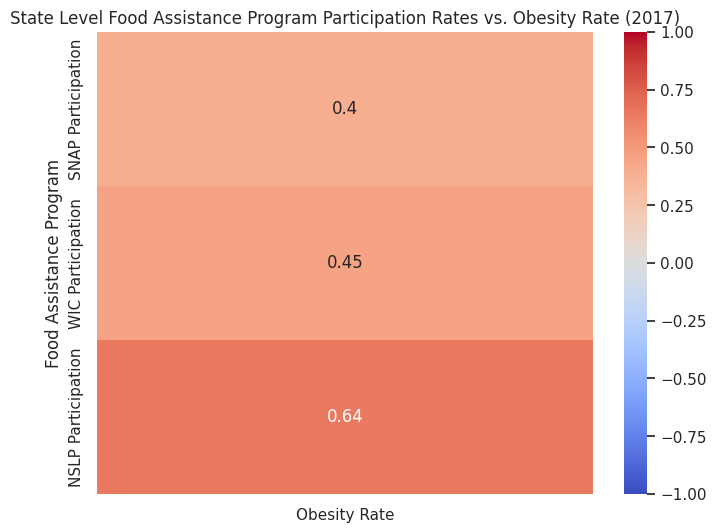

In [45]:
# Kyla's visualization code

# Approach:
# - calculate obesity rate from BFRSS
# - use all food assistance variables from food atlas to aggregate counties to state level data
# - visualize this on a heatmap to compare each program participation with obesity rate
# - analyze correlation

# Get overall obesity rate per state from BFRSS (54 states/territories):
obesity_df = df_long[(df_long['YearStart'] == 2017) &
                    (df_long['Question'] == 'Percent of adults aged 18 years and older who have obesity') &
                   (df_long['StratificationID1'].str.strip() == "OVERALL") &
                     (df_long['Total'] == 'Total') &
                     (df_long['Value'] == 'BRFSS')
                   ].reset_index(drop=True)

# only include main 50 states
obesity_df = obesity_df[obesity_df['LocationDesc'] != 'National'].reset_index(drop=True)
obesity_df = obesity_df[obesity_df['LocationDesc'] != 'District of Columbia'].reset_index(drop=True)
obesity_df = obesity_df[obesity_df['LocationDesc'] != 'Guam'].reset_index(drop=True)
obesity_df = obesity_df[obesity_df['LocationDesc'] != 'Puerto Rico'].reset_index(drop=True)
obesity_df = obesity_df[obesity_df['LocationDesc'] != 'Virgin Islands'].reset_index(drop=True)
obesity_df = obesity_df[['YearStart', 'LocationAbbr', 'LocationDesc', 'Data_Value']]
obesity_df.rename(columns={'Data_Value': 'Obesity_Rate'}, inplace=True)
obesity_df

# Get avg food assistance participation per state from Food Atlas dataset

# filter by food assistance variables to use
food_vars = ["PCT_SNAP17", "PCT_WIC17", "PCT_NSLP17"]
fa_df = main_df[main_df['Variable_Code'].isin(food_vars)]

# Get state level data by taking the mean across counties
fa_state = fa_df.groupby(['State', 'Variable_Code'])['Value'].mean().reset_index()
fa_state = fa_state.pivot(index='State', columns='Variable_Code', values='Value').reset_index()
fa_state = fa_state[fa_state['State'] != 'DC'].reset_index(drop=True)


food_assistance_df = pd.merge(obesity_df, fa_state, left_on="LocationAbbr", right_on="State", how="inner")
food_assistance_df.rename(columns={"Data_Value": "Obesity_Rate"}, inplace=True)
food_assistance_df


melted_df = food_assistance_df[['LocationAbbr', 'Obesity_Rate', 'PCT_SNAP17', 'PCT_WIC17', 'PCT_NSLP17']].melt(id_vars='LocationAbbr',
                                  var_name='Metric', value_name='Percentage')
cols_to_numeric = ['PCT_SNAP17', 'PCT_WIC17', 'PCT_NSLP17']
for col in cols_to_numeric:
    food_assistance_df[col] = pd.to_numeric(food_assistance_df[col], errors="coerce")
print(food_assistance_df)

heatmap_data = food_assistance_df[["PCT_SNAP17", "PCT_WIC17", "PCT_NSLP17"]].corrwith(food_assistance_df["Obesity_Rate"])
heatmap_data.index = ["SNAP Participation", "WIC Participation", "NSLP Participation"]
h_df = pd.DataFrame(heatmap_data, columns=["Obesity Rate"])
print(h_df)

# heatmap plotting
plt.figure(figsize=(8, 6))

sns.heatmap(h_df, annot=True, cmap="coolwarm", vmin=-1, vmax=1, cbar=True)
plt.ylabel("Food Assistance Program")
plt.title("State Level Food Assistance Program Participation Rates vs. Obesity Rate (2017)")
plt.show()


Kyla's Second Visualization:


**Hypothesis:** States with more accessibility to grocery stores and specialized stores will have lower average obesity rates while accessibility to more super stores and convenience stores will lead to higher average obesity rates.

**Discussion:** This topic is interesting because it could show how increased access to different types of stores can possibly have a correlation with obesity rates. Grocery stores and specialized stores would likely have healthier options with specialized stores often focusing on a specific item like cheese, nuts, etc. Because these are healthier options, it would make sense for the obesity rates to go down. For super stores and convenience stores like 7-11 and Walmart, consumers will often have access to a much wider selection of food including chips, sodas, candies, etc. This may have an impact on obesity rates because it could lead to an increased consumption of these kinds of foods.

**Visualization:** This visualization takes data per state related to the number of grocery stores per thousand, convenience stores per thousand , superstores per thousand, and specialized stores per thousand in 2016 and compares it to the obesity rate from 2016. The findings of this visualization show positive correlations between superstores per thousand and convenience stores per thousand with obesity rates, with superstores per thousand having the highest correlation coefficient of 0.49. This shows as the number of super stores/convenience stores per thousand increase, the obesity rates also tend to increase. However, the opposite is shown for grocery stores (-0.22) and specialized stores (-0.54), as they both have negative correlation rates with obesity. This shows that as the number of specialized store / grocery store access per thousand tends to increase, the obesity rate tends to decrease. This supports the hypothesis we had, and it could go to support the opening of more grocery stores and specialized stores. However, it is important to acknowledge that a variety of other factors also can play a role in the obesity rate.

    YearStart LocationAbbr    LocationDesc  Obesity_Rate State  CONVSPTH16  \
0        2016           AK          Alaska          31.4    AK    0.274247   
1        2016           AL         Alabama          35.7    AL    0.733528   
2        2016           AR        Arkansas          35.7    AR    0.597867   
3        2016           AZ         Arizona          29.0    AZ    0.468572   
4        2016           CA      California          25.0    CA    0.338473   
5        2016           CO        Colorado          22.3    CO    0.567493   
6        2016           CT     Connecticut          26.0    CT    0.367140   
7        2016           DE        Delaware          30.7    DE    0.340045   
8        2016           FL         Florida          27.4    FL    0.528344   
9        2016           GA         Georgia          31.4    GA    0.812838   
10       2016           HI          Hawaii          23.8    HI    0.274977   
11       2016           IA            Iowa          32.0    IA  

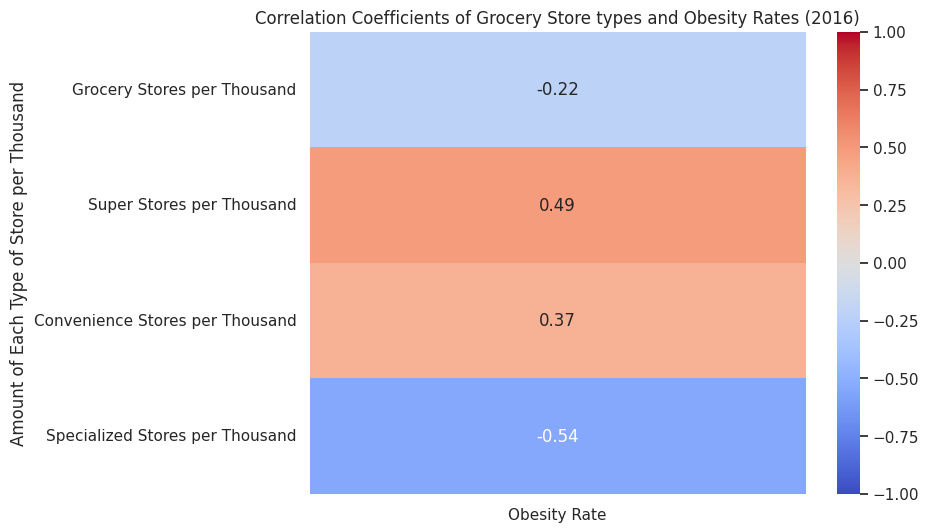

In [46]:
# Kyla's visualization code

# Approach:
# - calculate obesity rate from BFRSS
# - use all food assistance variables from food atlas to aggregate counties to state level data
# - visualize this on a heatmap to compare each store type per thousand with obesity rate
# - analyze correlation

# Get overall obesity rate per state from BFRSS (54 states/territories):
obesity_df = df_long[(df_long['YearStart'] == 2016) &
                    (df_long['Question'] == 'Percent of adults aged 18 years and older who have obesity') &
                   (df_long['StratificationID1'].str.strip() == "OVERALL") &
                     (df_long['Total'] == 'Total') &
                     (df_long['Value'] == 'BRFSS')
                   ].reset_index(drop=True)

# only include main 50 states
obesity_df = obesity_df[obesity_df['LocationDesc'] != 'National'].reset_index(drop=True)
obesity_df = obesity_df[obesity_df['LocationDesc'] != 'District of Columbia'].reset_index(drop=True)
obesity_df = obesity_df[obesity_df['LocationDesc'] != 'Guam'].reset_index(drop=True)
obesity_df = obesity_df[obesity_df['LocationDesc'] != 'Puerto Rico'].reset_index(drop=True)
obesity_df = obesity_df[obesity_df['LocationDesc'] != 'Virgin Islands'].reset_index(drop=True)
obesity_df = obesity_df[['YearStart', 'LocationAbbr', 'LocationDesc', 'Data_Value']]
obesity_df.rename(columns={'Data_Value': 'Obesity_Rate'}, inplace=True)
obesity_df

# Get avg food assistance participation per state from Food Atlas dataset

# filter by food assistance variables to use
food_vars = ["GROCPTH16", "SUPERCPTH16", "CONVSPTH16", "SPECSPTH16"]
fa_df = main_df[main_df['Variable_Code'].isin(food_vars)]

# Get state level data by taking the mean across counties
fa_state = fa_df.groupby(['State', 'Variable_Code'])['Value'].mean().reset_index()
fa_state = fa_state.pivot(index='State', columns='Variable_Code', values='Value').reset_index()
fa_state = fa_state[fa_state['State'] != 'DC'].reset_index(drop=True)


food_assistance_df = pd.merge(obesity_df, fa_state, left_on="LocationAbbr", right_on="State", how="inner")
food_assistance_df.rename(columns={"Data_Value": "Obesity_Rate"}, inplace=True)
food_assistance_df


melted_df = food_assistance_df[['LocationAbbr', 'Obesity_Rate', "GROCPTH16", "SUPERCPTH16", "CONVSPTH16", "SPECSPTH16"]].melt(id_vars='LocationAbbr',
                                  var_name='Metric', value_name='Percentage')
cols_to_numeric = ["GROCPTH16", "SUPERCPTH16", "CONVSPTH16", "SPECSPTH16"]
for col in cols_to_numeric:
    food_assistance_df[col] = pd.to_numeric(food_assistance_df[col], errors="coerce")
print(food_assistance_df)

heatmap_data = food_assistance_df[["GROCPTH16", "SUPERCPTH16", "CONVSPTH16", "SPECSPTH16"]].corrwith(food_assistance_df["Obesity_Rate"])
heatmap_data.index = ["Grocery Stores per Thousand", "Super Stores per Thousand", "Convenience Stores per Thousand", "Specialized Stores per Thousand"]
h_df = pd.DataFrame(heatmap_data, columns=["Obesity Rate"])
print(h_df)

# heatmap plotting
plt.figure(figsize=(8, 6))

sns.heatmap(h_df, annot=True, cmap="coolwarm", vmin=-1, vmax=1, cbar=True)
plt.ylabel("Amount of Each Type of Store per Thousand")
plt.title("Correlation Coefficients of Grocery Store types and Obesity Rates (2016)")
plt.show()


#### Visualization Title 2
Rasleen's visualization explanation here

Hypothesis: Those who have obtained a higher education will have lower rates of obesity.

I chose this because I found it interesting to see how knowledge can correlate to how one can choose their diet or relate to their health. Education factors into many life decisions, whether it be diet, job type, money saving, where one lives, etc. I wanted to see how education levels can correlate with how obesity affects a person, and some extra research that could go into this is seeing why those specific education levels have those higher rates of obesity or lower rates of obesity.

Exploratory Data Analysis: This data does show that there is a correlation between education levels and obesity rate. The lowest obesity rate percentage belonged to the group that completed teh most education (college graduates). The group with the second lowest obesity rates were the group that had the next most education (some level of college or technical school). The third obesity rate group would be the group that had teh second lowest education level (high school graduate) and the group with the highest obesity rate was the group with the lowest education level (less than highschool). This supports the hypothesis; however, it is also important to mention that there is a 3% difference between the lowest and highest obesity rate.

<ipython-input-47-8acfadece18c>:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




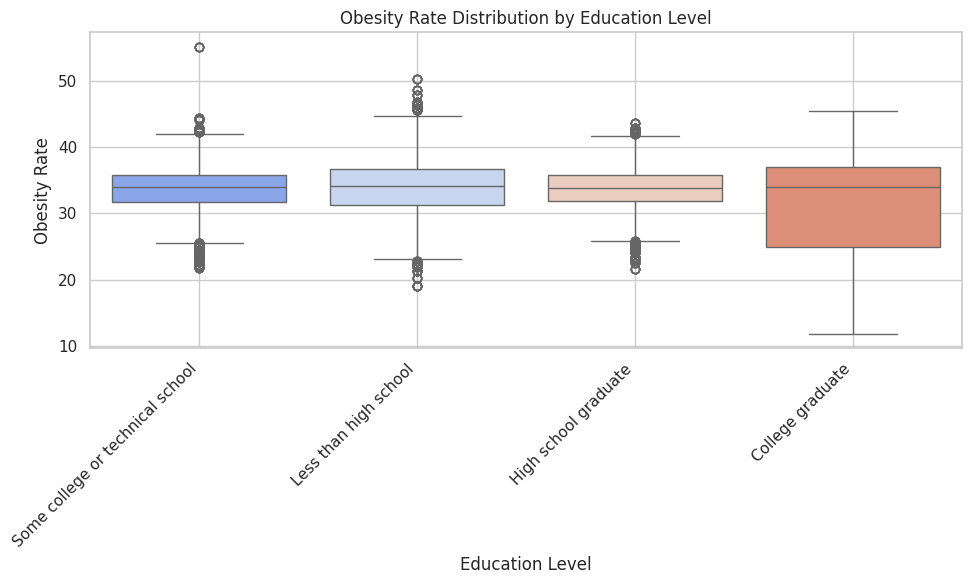

In [47]:
# Rasleen's visualization code
# Going to use a box and whispers plot to visualize data
import plotly.graph_objects as go

# Approach:
# - Calculate the obesity rates based on education levels
# - Visualize the data with a scatter plot
# - Analyze results
# Filter the data based on education and obesity columns
cleaned_df = df_long[
    (df_long['Education'].notna()) &  # Get rid of missing data in the Education_Level column
    (df_long['Class'] == 'Obesity / Weight Status') &  # Only have the obesity data in the class column
    (df_long['Data_Value'].notna())  # Remove missing values in the Data_Value column
].reset_index(drop=True)

# Group by the 'Education' and calculate mean obesity rate
education_obesity = cleaned_df.groupby('Education')['Data_Value'].mean()
plt.figure(figsize=(10,6))

# Create a box plot for obesity rates by education level
sns.boxplot(x='Education', y='Data_Value', data=cleaned_df, palette='coolwarm')

# Customize the plot
plt.title('Obesity Rate Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Obesity Rate')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

plt.tight_layout()
plt.show()


Rasleen's Second Visualization: Bar Chart




Average density of fast food restaurants, farmers markets, convenience stores, and grocery stores, vs. obesity rates.

Hypothesis: Fast food restaurants would have a higher obesity rate as the food is generally unhealthier, farmer's markets would have a lower rate of obesity as the food is organically and locally grown meaning there are more healthier options, grocery stores have a lower rate because there are healthy options available for people, and convenience stores would have a higher rate of obesity because it has fast meals that are unhealthy for the general person.

Analysis:
My hypothesis was correct for each type of food place. Fast food restaurants had the highest rate of obesity amongst all options, followed by convenience store, grocery store, and farmer's markets had very little rates of obesity. This shows us that certain types of food places are either healthier or unhealthier for the average human being, whether it be due to the type of ingredients they use in their food, how the food is produced, where the ingredients come from, etc.


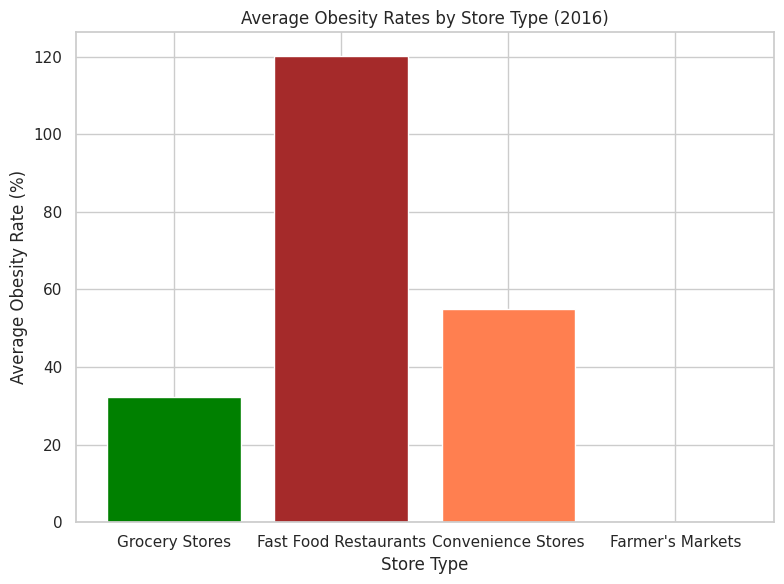

In [48]:

cleaned_df2016 = df_long[
   (df_long['YearStart'] == 2016) &
    (df_long['Class'] == 'Obesity / Weight Status') &
    (df_long['Data_Value'].notna())  # Remove missing values in the Data_Value column

].reset_index(drop=True)



rd_df = main_df[main_df['Variable_Code'] == "FFR16"]
rd_df2 = main_df[main_df['Variable_Code'] == "FSR16"]
rd_df3 = main_df[main_df['Variable_Code'] == "GROC16"]
rd_df4 = main_df[main_df['Variable_Code'] == "CONVS16"]
rd_df5 = main_df[main_df['Variable_Code'] == "FMRKTPTH18"]



rd_state = rd_df.groupby(['State', 'Variable_Code'])['Value'].mean().reset_index()
rd_state = rd_state.pivot(index='State', columns='Variable_Code', values='Value').reset_index()

rd_state2 = rd_df2.groupby(['State', 'Variable_Code'])['Value'].mean().reset_index()

rd_state3 = rd_df3.groupby(['State', 'Variable_Code'])['Value'].mean().reset_index()
rd_state3 = rd_state3.pivot(index='State', columns='Variable_Code', values='Value').reset_index()


rd_state4 = rd_df4.groupby(['State', 'Variable_Code'])['Value'].mean().reset_index()
rd_state4 = rd_state4.pivot(index='State', columns='Variable_Code', values='Value').reset_index()

rd_state5 = rd_df5.groupby(['State', 'Variable_Code'])['Value'].mean().reset_index()
rd_state5 = rd_state5.pivot(index='State', columns='Variable_Code', values='Value').reset_index()




# merged_df = cleaned_df2016.merge(rd_state, left_on="LocationAbbr", right_on="State", how="inner")

# merged_df = merged_df.merge(rd_state3[['State', 'GROC16']], on='State', how='inner')
# merged_df = merged_df.merge(rd_state4[['State', 'CONVS16']], on='State', how='inner')
# merged_df = merged_df.merge(rd_state5[['State', 'FMRKTPTH18']], on='State', how='inner')
obesity_by_state = cleaned_df2016.groupby('LocationAbbr')['Data_Value'].mean().reset_index()


merged_df = obesity_by_state.merge(rd_state, left_on="LocationAbbr", right_on="State", how="inner")
# merged_df = merged_df.merge(rd_state2, left_on="LocationAbbr", right_on="State", how="inner")
merged_df = merged_df.merge(rd_state3[['State', 'GROC16']], on='State', how='inner')  # Ensure GROC16 is included
merged_df = merged_df.merge(rd_state4[['State', 'CONVS16']], on='State', how='inner')
merged_df = merged_df.merge(rd_state5[['State', 'FMRKTPTH18']], on='State', how='inner')
merged_df['FFR16'] = merged_df['FFR16']  # Multiply by 100 to convert to percentage if needed


obesity_rates = [
    merged_df['GROC16'].mean(),
    merged_df['FFR16'].mean(),
    merged_df['CONVS16'].mean(),
    merged_df['FMRKTPTH18'].mean(),


    # Average obesity rate for fast food restaurant density
   ]



# Calculate the correlation between 'Obesity Rate' and 'Access to Grocery Stores'
correlation_ffr_obesity = merged_df[['FFR16', 'Data_Value']].corr()
store_types = ['Grocery Stores', 'Fast Food Restaurants', 'Convenience Stores', 'Farmer\'s Markets']


# Step 3: Create a scatter plot to show average obesity rates for different store types
plt.figure(figsize=(8, 6))

# Use scatter plot to show average values for each store type
plt.bar(store_types, obesity_rates, color=['green', 'brown', 'coral', 'blue'])

# Step 4: Add labels and title
plt.xlabel('Store Type')
plt.ylabel('Average Obesity Rate (%)')
plt.title('Average Obesity Rates by Store Type (2016)')

# Step 5: Show the plot
plt.tight_layout()
plt.show()

#### Obesity Rates Based on Sex Data
Shimra:

Hypothesis: There will not be a significant difference of obesity rates between females and males.

Analysis: After visualizing the obesity rate data based on gender, I would say that while the pie chart does not show a drastic difference, it's still important to note how males are more likely to be obese in their lives. It can help open up new areas of research to look into why this may be and how to improve these rates. These types of research can venture into areas like whether a specific hormone present in males is what's affecting this obesity rate. Overall, understanding this data is imperative to looking towards a plausible solution.


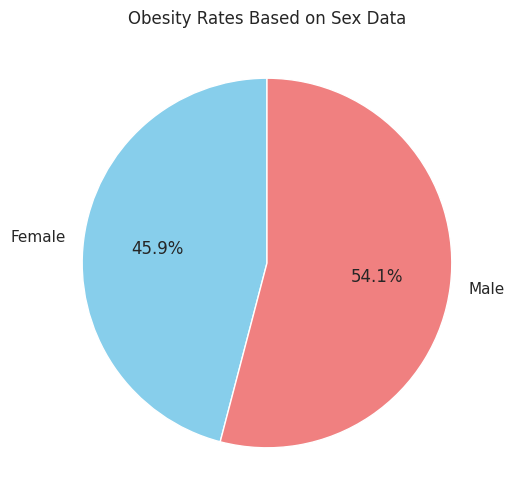

In [49]:
# Shimra's Visualization code

# Approach:
# - calculate obesity rate based on sex
# - visualize the data using a piechart
# - analyze correlation

cleaned_df = df_long[
    (df_long['Sex'].isin(['Male', 'Female'])) & # Get rid of missing data in the Sex column
    (df_long['Class'] == 'Obesity / Weight Status') & # Only have the obesity data in the class column
    (df_long['Data_Value'].notna()) # Remove missing values in the data_value column
].reset_index(drop=True)

cleaned_df.head()

sex_obesity = cleaned_df.groupby('Sex')['Data_Value'].mean()

# Plot as a pie chart
plt.figure(figsize=(6,6))
plt.pie(
    sex_obesity,
    labels=sex_obesity.index,
    autopct='%1.1f%%', # Display the percentage number
    startangle=90,
    colors=['skyblue', 'lightcoral']
)

plt.title('Obesity Rates Based on Sex Data')
plt.show()

### Shimra's Visualization: Correlation of Farm Variabels with Obesity Rate

This heatmap visualizes the correlation between farms and farm acreage to obesity rates.

Hypothesis: States with more fresh veg farms and more acres dedicated to fresh vegetables will have the lowest obesity rates due to the increase in access to healthier produce.

Analysis: It seems like my hypothesis was incorrect because obesity rates are not the lowest with fresh veg farms. However, there is a correlation that with more fresh veg farms and fresh veg farm acres, obesity rates tend to be lowered.

Other analyses: It seems like direct sales to consumers from farms is what ultimately lowers obesity rates most effectively. This may be because these produce are fresh and healthier, thus directly reducing obesity rates.

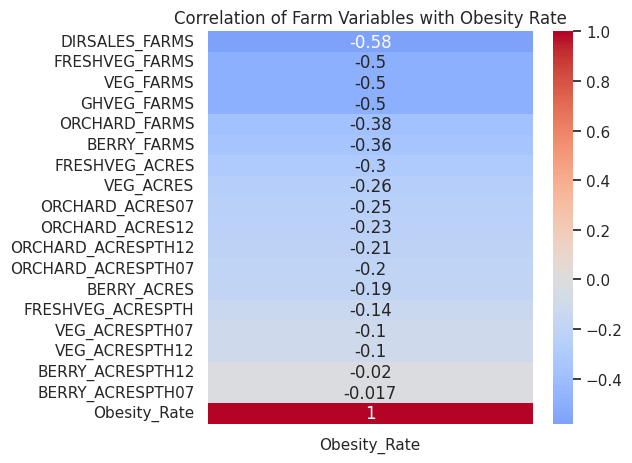

In [50]:
# Shimra's second Visualization


# 1. Load and filter farm variables

farm_df = variable_df[
    variable_df['Variable_Code'].str.contains('farm|acre', case=False, na=False)
]
farm_df = farm_df[farm_df['Units'].str.contains('Count|Acres', case=False, na=False)]

# 2. Filter main_df to only include rows with those farm-related variable codes
farm_variable_codes = farm_df['Variable_Code'].unique()
farm_data = main_df[main_df['Variable_Code'].isin(farm_variable_codes)]

# 3. Aggregate by state
farm_state_data = farm_data.groupby(['State', 'Variable_Code'])['Value'].mean().reset_index()

# 4. Pivot to wide format
farm_wide = farm_state_data.pivot(index='State', columns='Variable_Code', values='Value').reset_index()

# 5. Process obesity data (already filtered to 2016)
obesity_by_state = cleaned_df2016.groupby('LocationAbbr')['Data_Value'].mean().reset_index()
obesity_by_state = obesity_by_state.rename(columns={'LocationAbbr': 'State', 'Data_Value': 'Obesity_Rate'})

# 6. Merge farm data with obesity data
merged_farm_obesity = obesity_by_state.merge(farm_wide, on='State', how='inner')

merged_farm_obesity['VEG_FARMS'] = merged_farm_obesity[['VEG_FARMS07', 'VEG_FARMS12']].mean(axis=1)
merged_farm_obesity = merged_farm_obesity.drop(['VEG_FARMS07', 'VEG_FARMS12'], axis=1)

merged_farm_obesity['BERRY_ACRES'] = merged_farm_obesity[['BERRY_ACRES07', 'BERRY_ACRES12']].mean(axis=1)
merged_farm_obesity = merged_farm_obesity.drop(['BERRY_ACRES07', 'BERRY_ACRES12'], axis=1)

merged_farm_obesity['BERRY_FARMS'] = merged_farm_obesity[['BERRY_FARMS07', 'BERRY_FARMS12']].mean(axis=1)
merged_farm_obesity = merged_farm_obesity.drop(['BERRY_FARMS07', 'BERRY_FARMS12'], axis=1)

merged_farm_obesity['DIRSALES_FARMS'] = merged_farm_obesity[['DIRSALES_FARMS07', 'DIRSALES_FARMS12']].mean(axis=1)
merged_farm_obesity = merged_farm_obesity.drop(['DIRSALES_FARMS07', 'DIRSALES_FARMS12'], axis=1)

merged_farm_obesity['FRESHVEG_ACRES'] = merged_farm_obesity[['FRESHVEG_ACRES07', 'FRESHVEG_ACRES12']].mean(axis=1)
merged_farm_obesity = merged_farm_obesity.drop(['FRESHVEG_ACRES07', 'FRESHVEG_ACRES12'], axis=1)

merged_farm_obesity['FRESHVEG_ACRESPTH'] = merged_farm_obesity[['FRESHVEG_ACRESPTH07', 'FRESHVEG_ACRESPTH12']].mean(axis=1)
merged_farm_obesity = merged_farm_obesity.drop(['FRESHVEG_ACRESPTH07', 'FRESHVEG_ACRESPTH12'], axis=1)

merged_farm_obesity['ORCHARD_FARMS'] = merged_farm_obesity[['ORCHARD_FARMS07', 'ORCHARD_FARMS12']].mean(axis=1)
merged_farm_obesity = merged_farm_obesity.drop(['ORCHARD_FARMS07', 'ORCHARD_FARMS12'], axis=1)

merged_farm_obesity['VEG_ACRES'] = merged_farm_obesity[['VEG_ACRES07', 'VEG_ACRES07']].mean(axis=1)
merged_farm_obesity = merged_farm_obesity.drop(['VEG_ACRES07', 'VEG_ACRES12'], axis=1)

merged_farm_obesity['FRESHVEG_FARMS'] = merged_farm_obesity[['FRESHVEG_FARMS07', 'FRESHVEG_FARMS12']].mean(axis=1)
merged_farm_obesity = merged_farm_obesity.drop(['FRESHVEG_FARMS07', 'FRESHVEG_FARMS12'], axis=1)

merged_farm_obesity['GHVEG_FARMS'] = merged_farm_obesity[['GHVEG_FARMS07', 'GHVEG_FARMS12']].mean(axis=1)
merged_farm_obesity = merged_farm_obesity.drop(['GHVEG_FARMS07', 'GHVEG_FARMS12'], axis=1)

merged_farm_obesity

# Get only correlation with Obesity_Rate
obesity_corr = merged_farm_obesity.drop(columns=['State']).corr()['Obesity_Rate'].sort_values()

# Plot as bar or single-column heatmap
sns.heatmap(obesity_corr.to_frame(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of Farm Variables with Obesity Rate')
plt.tight_layout()
plt.show()

#### Shimra's Second Visualization: Obesity Rates Based on Age

Hypothesis: People aged from 18 - 34 will have a higher rate of obesity than people beyond that age.

Analysis: My hypothesis was incorrect as it looks like people aged from 35-44 have the lowest obesity rate compared to other age groups as shown in the dip in the line plot. However, obesity still peaks in the age group of 45-54. At first, I believed that obesity rates would be higher in the younger age groups because of instability regarding to income levels compared to the financial stability that people in the older age groups have.

['35 - 44' '25 - 34' '18 - 24' '55 - 64' '65 or older' '45 - 54']


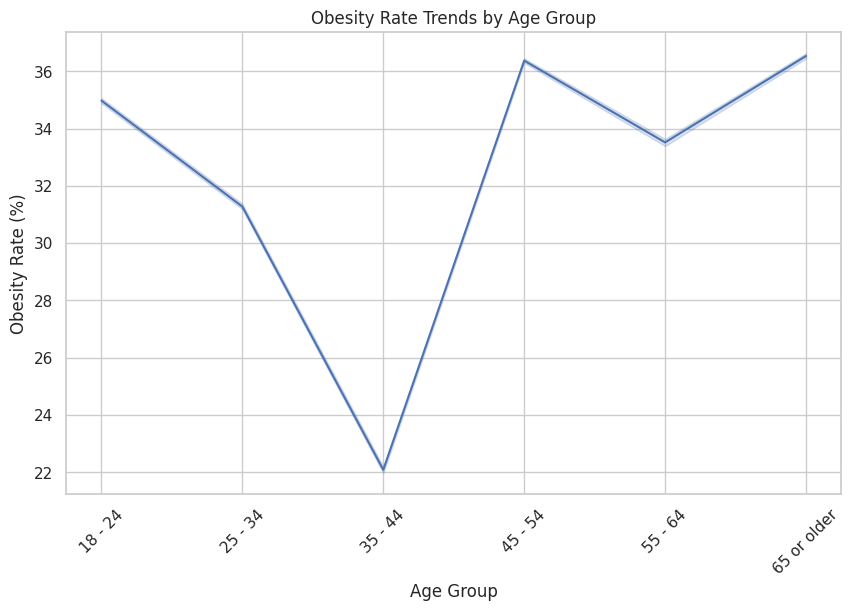

In [51]:

print(cleaned_d2['Age(years)'].unique())

age_list = ['18 - 24', '25 - 34', '35 - 44', '45 - 54', '55 - 64', '65 or older']

plt.figure(figsize = (10, 6))
sns.lineplot(data=cleaned_d2, x = 'Age(years)', y='Data_Value', sort = False)
plt.xticks(ticks = range(len(age_list)), labels = age_list, rotation=45)

plt.title("Obesity Rate Trends by Age Group")
plt.ylabel("Obesity Rate (%)")
plt.xlabel("Age Group")
plt.show()



In [52]:
main_df

,FIPS,State,County,Variable_Code,Value
0,1001,AL,Autauga,LACCESS_POP10,18428.439690
1,1001,AL,Autauga,LACCESS_POP15,17496.693040
2,1001,AL,Autauga,PCH_LACCESS_POP_10_15,-5.056026
3,1001,AL,Autauga,PCT_LACCESS_POP10,33.769657
4,1001,AL,Autauga,PCT_LACCESS_POP15,32.062255
...,...,...,...,...,...
822385,56045,WY,Weston,PERPOV10,0.000000
822386,56045,WY,Weston,CHILDPOVRATE15,13.100000
822387,56045,WY,Weston,PERCHLDPOV10,0.000000
822388,56045,WY,Weston,METRO13,0.000000


#### Visualization 4: Obesity Rates Based on Income Level
Fatimah:

Hypothesis: Lower income groups will have higher obesity rates.

Interest: I thought this hypothesis would be interesting to explore because income plays an important and unignorable role in determining the kinds of food people can access. In the last few years, there has been a rise of interest in healthy and organic eating; however, manytimes, it feels like only the wealthiest individuals can afford these options. Organic and nutritious foods usually come with a high price mark that many people cannot afford. As income levels decrease, so does access to healthier food options. This issue is something I think about often, and it has grown my interest in gardening which could alleviate some of the monetary burden.

Analysis: After cleaning and extracting the data to create the horizontal bar chart of the income levels correlation to obesity, we can see that the hypothesis holds. The hypothesis focuses on the idea that people with lower income face more obstacles in keeping a healthy lifestyle. Lower incomes could mean less access to nutritious food, less opportunities for physical activity, or even higher levels of stress. These are all factors which can lead to higher obesity rates. The data in the visualization shows that those earning less than $15,000 annually have an obesity rate of 35.7 % while those with the highest income bracket of $$75,000 or greater, have a much lower obesity rate of 28.6%. There is a steady decline of obesity as income increases across all the different income brackets as well. This is interesting to see as it shows socioeconomic factors that could influence health outcomes and may help us work towards finding a solution.

<ipython-input-53-447286b93dc8>:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




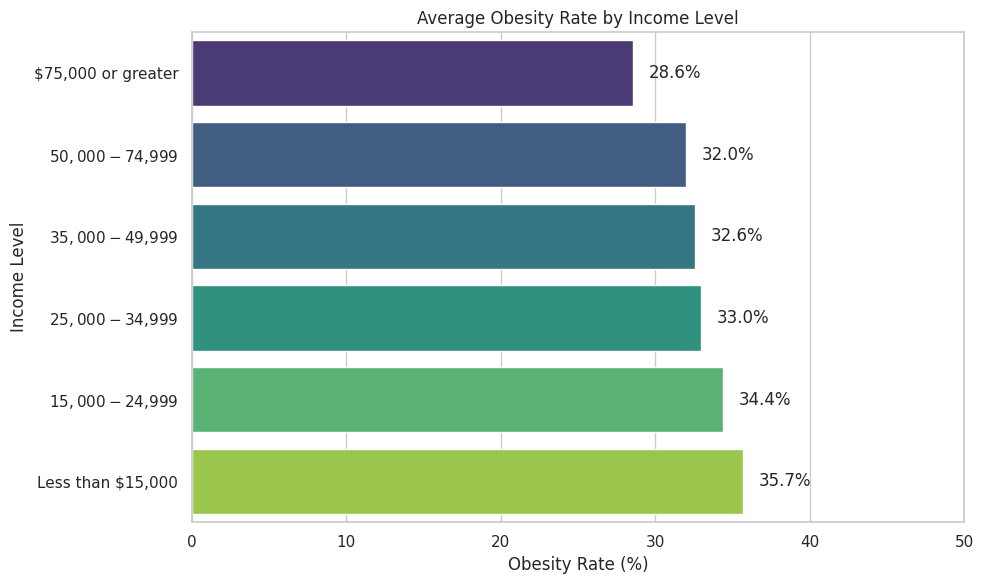

In [53]:
#Fatimah's Visualization

# Approach:
# - get all the obesity related data from the BRFSS dataset
# - take out all null values and keep the defined income groups
# - order income levels from high to low
# - calculate avg obesity rates by income level
# - create a horizontal bar chart
# Hypothesis: Lower income groups will have higher obesity rates.

#ordering the bar chart as top to bottom with highest income on top
income_order = { #each grouping is specified in the data
    "$75,000 or greater": 0,
    "$50,000 - $74,999": 1,
    "$35,000 - $49,999": 2,
    "$25,000 - $34,999": 3,
    "$15,000 - $24,999": 4,
    "Less than $15,000": 5
}

#get just the main obesity questions so data is more managable and convert to long
obesity_df = df_long[(df_long['Question'] == 'Percent of adults aged 18 years and older who have obesity') & (df_long['Income'].isin(income_order.keys())) & (df_long['Data_Value'].notna()) ].copy()

obesity_df['IncomeOrder'] = obesity_df['Income'].map(income_order) #add the income order as a column
income_grouped = obesity_df.groupby(['Income', 'IncomeOrder'])['Data_Value'].mean().reset_index() #group by income level
income_grouped = income_grouped.sort_values('IncomeOrder') #sort by income order

#plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(y='Income', x='Data_Value', data=income_grouped, palette="viridis")
plt.title('Average Obesity Rate by Income Level')
plt.xlabel('Obesity Rate (%)')
plt.ylabel('Income Level')
plt.xlim(0, 50)

#label the exact percent (to one decimal place) of each bin
for bar, label in zip(plt.gca().patches, income_grouped['Data_Value']):
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    plt.text(width + 1, y, f'{label:.1f}%', va='center')

plt.tight_layout()
plt.show()

Fatimah's 2nd Visualization: Obesity Rates by Race/Ethnicity

Hypothesis: Some race and ethnicity groups will have higher obesity rates than others.

Interest: I found the comparison between race/ethnicity and obesity to be interesting because I was aware of the systematic disparities of certain groups in the United States. Access to healthcare and nutritious food often differ across racial and ethnic groups. Many factors play into this such as neighborhood conditions, cultural food, access to healthcare, and many other variables. I wondered if these factors had enough influence to create clear trends in the obesity data and if certain communities are affected more than others. I believe this is an important topic to look into so we can understand how to create a positive change and decrease obesity.   

Analysis: To explore this, I used the data from the BRFSS dataset and filtered the data to only include the responses that had race/ethnicity information. This was to help create clearly defined race and ethnic categories. Then I calculated the average obesity rate for each group and created a horizontal bar chart to visualize the results. The barchart uncovered some very clear differences. The highest average obesity rate is for Non-Hispanic Black individuals, followed by American Indian/Alaska Native and Hispanic populations. On the other hand, Asian individuals have the lowest average obesity rate. These drastic differences in obesity rate highlight how social, economic, and environmental factors might be affecting some groups more than others. Overall the data supports the hypothesis and shows the importance of looking into these topics to find better solutions.

<ipython-input-54-91d144674b96>:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




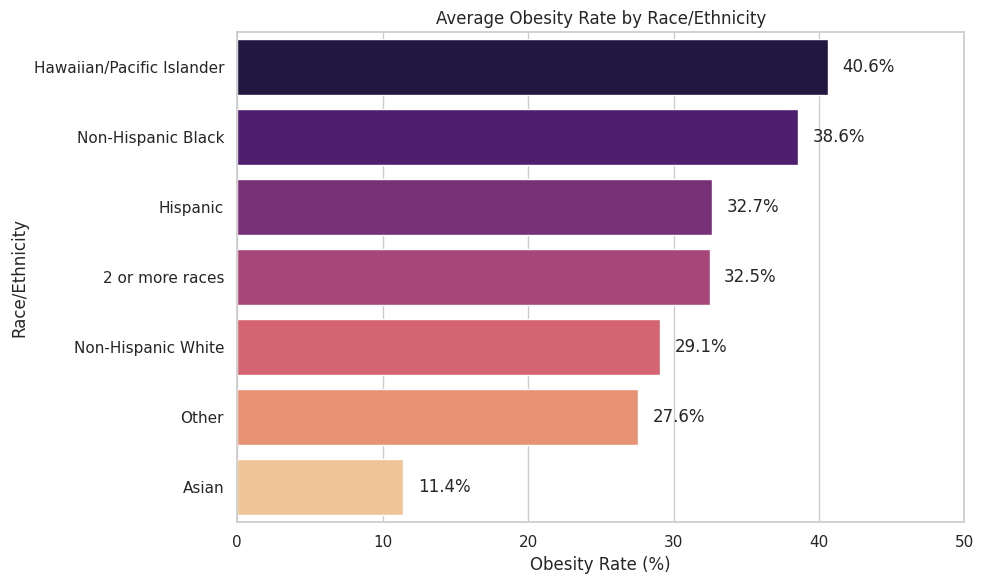

In [54]:
#Fatimah's 2md Visualization

# Approach:
# - get all obesity related data from the BRFSS dataset
# - filter so only rows where race is defined and Data_Value is not missing used
# - calculate avg obesity rates by race & ethnicity
# - create a horizontal bar chart ordered from highest obesity rate to lowest
# Hypothesis: Some race/ethnicity groups may experience higher obesity rates than others.

all_races = [ #list of races as named in dataset
    '2 or more races',
    'American Indian/ Alaska Native',
    'Asian',
    'Hawaiian/Pacific Islander',
    'Hispanic',
    'Non-Hispanic Black',
    'Non-Hispanic White',
    'Other'
]

#get just the main obesity questions filtered by race and with valid data
obesity_df = df_long[(df_long['Question'] == 'Percent of adults aged 18 years and older who have obesity') & (df_long['Race/Ethnicity'].isin(all_races)) & (df_long['Data_Value'].notna())].copy()

race_grouped = obesity_df.groupby('Race/Ethnicity')['Data_Value'].mean().reset_index() #group by race and calculate avg obesity rate
race_grouped = race_grouped.sort_values('Data_Value', ascending=False) #sort races from highest to lowest avg obesity

#make horiz bar chart
plt.figure(figsize=(10,6))
sns.barplot(y='Race/Ethnicity', x='Data_Value', data=race_grouped, palette="magma")
plt.title('Average Obesity Rate by Race/Ethnicity')
plt.xlabel('Obesity Rate (%)')
plt.ylabel('Race/Ethnicity')
plt.xlim(0, 50)

#label the exact percent (to one decimal place) of each bar
for bar, label in zip(plt.gca().patches, race_grouped['Data_Value']):
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    plt.text(width + 1, y, f'{label:.1f}%', va='center')

plt.tight_layout()
plt.show()

#### Visualization 5: Recreational Facility Access Vs. Obesity Rate (Fariha)

Hypothesis: States with increased access to recreational facilities will have lower obesity rates.

Discussion: I was interested in this particular topic because I wanted to see if there was any sort of correlationn between having access to a recreational facility like a gym nearby and a lower obesity rate. I was very excited to learn more about this because I feel a lot of different factors go into someone deciding to go to a recreational facility, like motivation. However, I also wondered if ease of access somehow contributed to this. Additionally, if there is found to be a correlation between recreational facilities per state and the obesity rate per state, I wonder if this is something we can call to action and encourage the building of more recreational facilities.

Data Analysis: A small negatve correlation can me made out by the graph of recreational facilities per thousand people and the obesity rate; however, it is by no means a super strong correlation. Generally, the states with lower recreational facilties per thousand rates tend to have higher obesity rates, with some outliers. Additionally, states with a higher recreational facility pepr thousand rate tend to have lower comparative obesity rates. Overall, I would say there is a relatively weak negative correlation between the two variables.


    YearStart LocationAbbr    LocationDesc  Obesity_Rate State  RECFACPTH16
0        2016           AK          Alaska          31.4    AK     0.053022
1        2016           AL         Alabama          35.7    AL     0.049532
2        2016           AR        Arkansas          35.7    AR     0.048270
3        2016           AZ         Arizona          29.0    AZ     0.051039
4        2016           CA      California          25.0    CA     0.093669
5        2016           CO        Colorado          22.3    CO     0.076026
6        2016           CT     Connecticut          26.0    CT     0.138244
7        2016           DE        Delaware          30.7    DE     0.131132
8        2016           FL         Florida          27.4    FL     0.074932
9        2016           GA         Georgia          31.4    GA     0.050215
10       2016           HI          Hawaii          23.8    HI     0.057451
11       2016           IA            Iowa          32.0    IA     0.091475
12       201

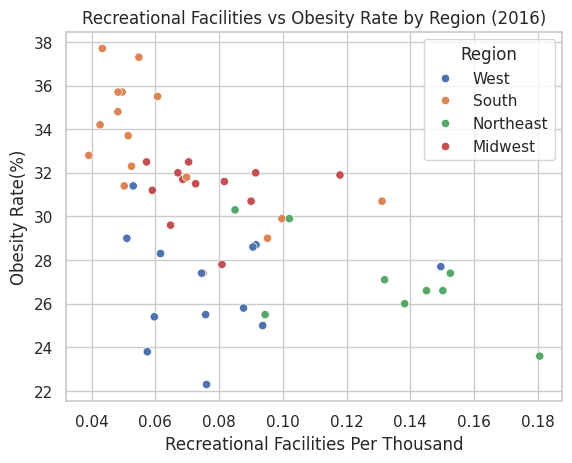

Correlation: -0.5460169212265509 


In [55]:
# Fariha's visualization code

# Aim:
# - insect the correlation between obesity rates and access to a recreational facility like a gym
# - construct a scatter plot to display this information

# Approach:
# - use obesity data form teh year 2016 from the BRFSS data set, and use the Rec facility access by the year 2016 from the food atlas data set
# - group data based on state
#- create a scatter plot of recreational facility access versus obesity rate with each state a a point on the scatter plot

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#filter the obesity data set to look at the percent of adults who had obesite in the year 2016
obesity_df = df_long[
    (df_long['YearStart'] == 2016) &
    (df_long['Question'] == 'Percent of adults aged 18 years and older who have obesity') &
    (df_long['StratificationID1'].str.strip() == "OVERALL") &
    (df_long['Total'] == 'Total') &
    (df_long['Value'] == 'BRFSS')
].reset_index(drop=True)

# exclude the values of other US territories, focusing only on the states, and update the data frame with teh obesity data
excluded = ['National', 'District of Columbia', 'Guam', 'Puerto Rico', 'Virgin Islands']
obesity_df = obesity_df[~obesity_df['LocationDesc'].isin(excluded)].reset_index(drop=True)
obesity_df = obesity_df[['YearStart', 'LocationAbbr', 'LocationDesc', 'Data_Value']]
obesity_df.rename(columns={'Data_Value': 'Obesity_Rate'}, inplace=True)

# look at the data only for the the rec facilities per thousand in 2016 and group by the state data from counties
rf_df = main_df[main_df['Variable_Code'] == "RECFACPTH16"]
rf_state = rf_df.groupby(['State', 'Variable_Code'])['Value'].mean().reset_index()
rf_state = rf_state.pivot(index='State', columns='Variable_Code', values='Value').reset_index()
rf_state = rf_state[rf_state['State'] != 'DC'].reset_index(drop=True)
#print(rf_state)

#merge bothe the obesity data and make sure all of teh columns that we are left with are numeric
rfacility_df = obesity_df.merge(rf_state, left_on="LocationAbbr", right_on="State", how="inner")
print(rfacility_df)

# assign states to regions
west= ["AK", "AZ", "CA", "CO", "HI", "ID", "MT", "NV", "NM", "OR", "UT", "WA", "WY"]
northeast= ["CT", "MA", "ME", "NH", "NJ", "NY", "PA", "RI", "VT"]
south= ["AL", "AR", "DC", "DE", "FL", "GA", "KY", "LA", "MD", "MS", "NC", "OK", "SC", "TN", "TX", "VA", "WV"]
midwest= ["IA", "IL", "IN", "KS", "MI", "MN", "MO", "NE", "ND", "OH", "SD", "WI"]

# create a function assign a region to a given state
def assign_region(state):
    if state in west:
        return "West"
    if state in northeast:
        return "Northeast"
    if state in south:
        return "South"
    if state in midwest:
        return "Midwest"


# add in the states
rfacility_df["Region"] = rfacility_df["State"].apply(assign_region)


# Scatter plot with color by region
sns.scatterplot(data=rfacility_df, x="RECFACPTH16", y="Obesity_Rate", hue="Region")

#make a scatter plot with states as the dots
plt.grid(True)
plt.title("Recreational Facilities vs Obesity Rate by Region (2016)")
plt.xlabel("Recreational Facilities Per Thousand")
plt.ylabel("Obesity Rate(%)")
plt.show()

corr_coeff = rfacility_df['Obesity_Rate'].corr(rfacility_df['RECFACPTH16'])
print(f"Correlation: {corr_coeff} ")

**Fariha's Second Visualization:**

**Hypothesis:** States with increased agrotourism operations will have decreased obesity rates


Discussion: Agrotourism essentially refers to a wide variety of services which aim to strengthen the relationships between farms and consumers. These services could include farm stands in which farmers directly sell food to consumers, farm/ranch tours, harvest activities, recreational farm tours, etc. This was particularly interesting because it can give a perspective on the issue of if a consumer has more of a direct relationship with a farm, would it impact their likelihood of eating that healthier food from that farm or not. Additionally, if it turns out that states with these increased operations have lower obesity rates, could it be something to encourage from the perspective of governments or even school field trips.


Data Analysis:  This visualization compares the number of agritourism operations per state (x-axis) to the obesity rates per state (y-axis) in 2012. In general, the calculated correlation coefficient came out to -0.44778442010873626. This shows a general modest negative correlation between obesity rates and the number of agrotourism operations per state. This, in turn, supports the hypothesis made; however, it is important to note that the correlation between the two variables was not strong, and there are likely a variety of other factors that impact the obesity rate per state.


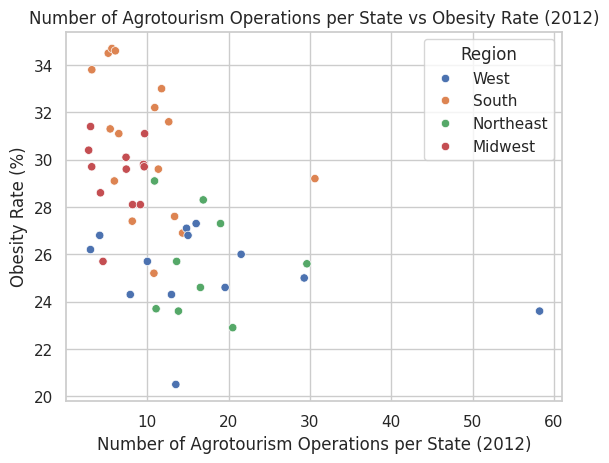

Correlation: -0.44778442010873626 


In [56]:
#filter the obesity data set to look at the percent of adults who had obesite in the year 2016
obesity_df = df_long[
    (df_long['YearStart'] == 2012) &
    (df_long['Question'] == 'Percent of adults aged 18 years and older who have obesity') &
    (df_long['StratificationID1'].str.strip() == "OVERALL") &
    (df_long['Total'] == 'Total') &
    (df_long['Value'] == 'BRFSS')
].reset_index(drop=True)

# Exclude territories and rename value column
excluded = ['National', 'District of Columbia', 'Guam', 'Puerto Rico', 'Virgin Islands']
obesity_df = obesity_df[~obesity_df['LocationDesc'].isin(excluded)].reset_index(drop=True)
obesity_df = obesity_df[['YearStart', 'LocationAbbr', 'LocationDesc', 'Data_Value']]
obesity_df.rename(columns={'Data_Value': 'Obesity_Rate'}, inplace=True)

# Group agritourism data by state
rf_df = main_df[main_df['Variable_Code'] == "AGRITRSM_OPS12"]
rf_state = rf_df.groupby(['State', 'Variable_Code'])['Value'].mean().reset_index()
rf_state = rf_state.pivot(index='State', columns='Variable_Code', values='Value').reset_index()
rf_state = rf_state[rf_state['State'] != 'DC'].reset_index(drop=True)

# Merge both obesity and agritourism datasets
aopp_df = obesity_df.merge(rf_state, left_on="LocationAbbr", right_on="State", how="inner")

# assign states to regions
west= ["AK", "AZ", "CA", "CO", "HI", "ID", "MT", "NV", "NM", "OR", "UT", "WA", "WY"]
northeast= ["CT", "MA", "ME", "NH", "NJ", "NY", "PA", "RI", "VT"]
south= ["AL", "AR", "DC", "DE", "FL", "GA", "KY", "LA", "MD", "MS", "NC", "OK", "SC", "TN", "TX", "VA", "WV"]
midwest= ["IA", "IL", "IN", "KS", "MI", "MN", "MO", "NE", "ND", "OH", "SD", "WI"]

# create a function assign a region to a given state
def assign_region(state):
    if state in west:
        return "West"
    if state in northeast:
        return "Northeast"
    if state in south:
        return "South"
    if state in midwest:
        return "Midwest"


# add in the states
aopp_df["Region"] = aopp_df["State"].apply(assign_region)


# Make an scatterplot with the number of operations as teh X-Axis, teh obesity rate as the y axis, and the legend as the regions
sns.scatterplot(data=aopp_df, x="AGRITRSM_OPS12", y="Obesity_Rate", hue="Region")

plt.xlabel("Number of Agrotourism Operations per State (2012)")
plt.ylabel("Obesity Rate (%)")
plt.legend(title="Region")

plt.title("Number of Agrotourism Operations per State vs Obesity Rate (2012)")
plt.grid(True)
plt.show()


# calculate the correlation coefficient
corr_coeff = aopp_df['Obesity_Rate'].corr(aopp_df['AGRITRSM_OPS12'])
print(f"Correlation: {corr_coeff} ")

### good ones to do: PC_WIC_REDEMP16, FMRKT_SNAP18, FMRKT_FRVEG18, CSA12, FARM_TO_SCHOOL15,AGRITRSM_OPS12

Fariha's Third Visualization (Additional Visualization):

Hypothesis: Increasing the amount of Farmers Markets that accept SNAP will show a decrease in obesity rates.


Discussion: This topic is particularly interesting because it is one that could be called to action. If increasing the amount of farmers markets that accept SNAP in fact correlates to a decrease in the obesity rate, it could be worth it to show the importance of increasing the access of healthier foods to people who may generally not be able to afford it. Realistically, healthy food tends to be more expensive, while junk food tends to be cheaper. Because of this, people may be more inclined to buy junk food, which could lead to more unhealthy habits. If farmers markets accept more food stamp participation and accept it as payment, it may allow families to have greater access to healthier food.


Data Analysis: This graph compared Obesity rates and the percent of farmers markets that accepted Snap per state. The correlation coefficient came out to about -0.3391071844694196, and this indicates that there is a negative correlation beetween obesity rates and the percent of farmers markets that accept snap per state. This could mean that states that tend to have more farmer's markets that accept snap tend to have lower obesity rates. However, it is important to note that this is not a strong correlation by any means.

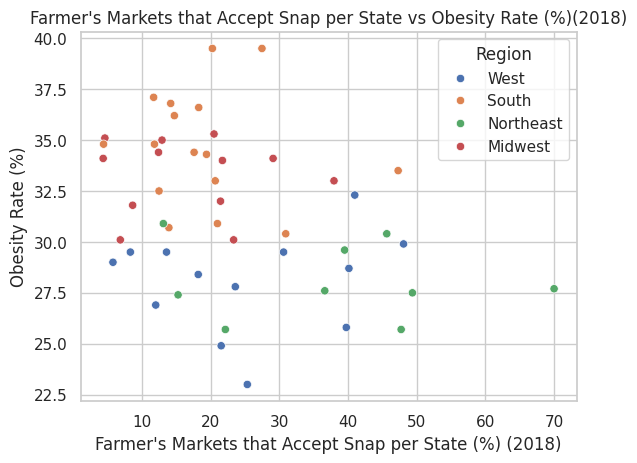

Correlation: -0.3391071844694196 


In [57]:
#filter the obesity data set to look at the percent of adults who had obesite in the year 2018
obesity_df = df_long[
    (df_long['YearStart'] == 2018) &
    (df_long['Question'] == 'Percent of adults aged 18 years and older who have obesity') &
    (df_long['StratificationID1'].str.strip() == "OVERALL") &
    (df_long['Total'] == 'Total') &
    (df_long['Value'] == 'BRFSS')
].reset_index(drop=True)

# Exclude territories and rename value column
excluded = ['National', 'District of Columbia', 'Guam', 'Puerto Rico', 'Virgin Islands']
obesity_df = obesity_df[~obesity_df['LocationDesc'].isin(excluded)].reset_index(drop=True)
obesity_df = obesity_df[['YearStart', 'LocationAbbr', 'LocationDesc', 'Data_Value']]
obesity_df.rename(columns={'Data_Value': 'Obesity_Rate'}, inplace=True)

# Group agritourism data by state
rf_df = main_df[main_df['Variable_Code'] == "PCT_FMRKT_SNAP18"]
rf_state = rf_df.groupby(['State', 'Variable_Code'])['Value'].mean().reset_index()
rf_state = rf_state.pivot(index='State', columns='Variable_Code', values='Value').reset_index()
rf_state = rf_state[rf_state['State'] != 'DC'].reset_index(drop=True)

# Merge both obesity and agritourism datasets
aopp_df = obesity_df.merge(rf_state, left_on="LocationAbbr", right_on="State", how="inner")

# assign states to regions
west= ["AK", "AZ", "CA", "CO", "HI", "ID", "MT", "NV", "NM", "OR", "UT", "WA", "WY"]
northeast= ["CT", "MA", "ME", "NH", "NJ", "NY", "PA", "RI", "VT"]
south= ["AL", "AR", "DC", "DE", "FL", "GA", "KY", "LA", "MD", "MS", "NC", "OK", "SC", "TN", "TX", "VA", "WV"]
midwest= ["IA", "IL", "IN", "KS", "MI", "MN", "MO", "NE", "ND", "OH", "SD", "WI"]

# create a function assign a region to a given state
def assign_region(state):
    if state in west:
        return "West"
    if state in northeast:
        return "Northeast"
    if state in south:
        return "South"
    if state in midwest:
        return "Midwest"


# add in the states
aopp_df["Region"] = aopp_df["State"].apply(assign_region)


# Make an scatterplot with the percent of farmer's markets that accept snap as teh X-Axis, teh obesity rate as the y axis, and the legend as the regions
sns.scatterplot(data=aopp_df, x="PCT_FMRKT_SNAP18", y="Obesity_Rate", hue="Region")

plt.xlabel("Farmer's Markets that Accept Snap per State (%) (2018)")
plt.ylabel("Obesity Rate (%)")
plt.legend(title="Region")

plt.title("Farmer's Markets that Accept Snap per State vs Obesity Rate (%)(2018)")
plt.grid(True)
plt.show()


# calculate the correlation coefficient
corr_coeff = aopp_df['Obesity_Rate'].corr(aopp_df['PCT_FMRKT_SNAP18'])
print(f"Correlation: {corr_coeff} ")

Another Additional Visualization:
This visualization looks at the relationship between obesity rates and two types of state level taxes in the U.S.; soda tax and general food tax using 2018 data. The hypothesis is that higher soda or food taxes might correlate with lower obesity rates, as such policies aim to discourage unhealthy consumption. The plots are color-coded by region to help identify potential regional patterns in both taxation and obesity prevalence. We see that Soda Tax vs Obesity Correlation: 0.111 and Food Tax vs Obesity Correlation: 0.225. These are both positive but weak correlations, which means thatdespite the hypothesis, higher soda and food taxes are slightly associated with higher obesity rates, not lower. However, the correlations are very small, meaning that there is no strong linear relationship between these taxes and obesity prevalence across states. So in this case we cannot assume that correlation equals causation and thus other factors such as socioeconomic status, physical activity, food access, education, and cultural differences likely play a much bigger role in affecting obesity rates compared to tax rates.

In [58]:
# Get overall obesity rate per state from BFRSS (54 states/territories):
obesity_df = df_long[(df_long['YearStart'] == 2014) &
                    (df_long['Question'] == 'Percent of adults aged 18 years and older who have obesity') &
                   (df_long['StratificationID1'].str.strip() == "OVERALL") &
                     (df_long['Total'] == 'Total') &
                     (df_long['Value'] == 'BRFSS')
                   ].reset_index(drop=True)

# only include main 50 states
obesity_df = obesity_df[obesity_df['LocationDesc'] != 'National'].reset_index(drop=True)
obesity_df = obesity_df[obesity_df['LocationDesc'] != 'District of Columbia'].reset_index(drop=True)
obesity_df = obesity_df[obesity_df['LocationDesc'] != 'Guam'].reset_index(drop=True)
obesity_df = obesity_df[obesity_df['LocationDesc'] != 'Puerto Rico'].reset_index(drop=True)
obesity_df = obesity_df[obesity_df['LocationDesc'] != 'Virgin Islands'].reset_index(drop=True)
obesity_df = obesity_df[['YearStart', 'LocationAbbr', 'LocationDesc', 'Data_Value']]
obesity_df.rename(columns={'Data_Value': 'Obesity_Rate'}, inplace=True)
obesity_df

# Get avg food assistance participation per state from Food Atlas dataset

# filter by food assistance variables to use
food_vars = ["SODATAX_STORES14", "CHIPSTAX_STORES14", "FOOD_TAX14"]
fa_df = main_df[main_df['Variable_Code'].isin(food_vars)]

# Get state level data by taking the mean across counties
fa_state = fa_df.groupby(['State', 'Variable_Code'])['Value'].mean().reset_index()
fa_state = fa_state.pivot(index='State', columns='Variable_Code', values='Value').reset_index()
fa_state = fa_state[fa_state['State'] != 'DC'].reset_index(drop=True)


food_assistance_df = pd.merge(obesity_df, fa_state, left_on="LocationAbbr", right_on="State", how="inner")
food_assistance_df.rename(columns={"Data_Value": "Obesity_Rate"}, inplace=True)
food_assistance_df


melted_df = food_assistance_df[['LocationAbbr', 'Obesity_Rate', 'SODATAX_STORES14', 'CHIPSTAX_STORES14', 'FOOD_TAX14']].melt(id_vars='LocationAbbr',
                                  var_name='Metric', value_name='Percentage')
cols_to_numeric = ['SODATAX_STORES14', 'CHIPSTAX_STORES14', 'FOOD_TAX14']
for col in cols_to_numeric:
    food_assistance_df[col] = pd.to_numeric(food_assistance_df[col], errors="coerce")
print(food_assistance_df)

    YearStart LocationAbbr    LocationDesc  Obesity_Rate State  \
0        2014           AK          Alaska          29.7    AK   
1        2014           AL         Alabama          33.5    AL   
2        2014           AR        Arkansas          35.9    AR   
3        2014           AZ         Arizona          28.9    AZ   
4        2014           CA      California          24.7    CA   
5        2014           CO        Colorado          21.3    CO   
6        2014           CT     Connecticut          26.3    CT   
7        2014           DE        Delaware          30.7    DE   
8        2014           FL         Florida          26.2    FL   
9        2014           GA         Georgia          30.5    GA   
10       2014           HI          Hawaii          22.1    HI   
11       2014           IA            Iowa          30.9    IA   
12       2014           ID           Idaho          28.9    ID   
13       2014           IL        Illinois          29.3    IL   
14       2

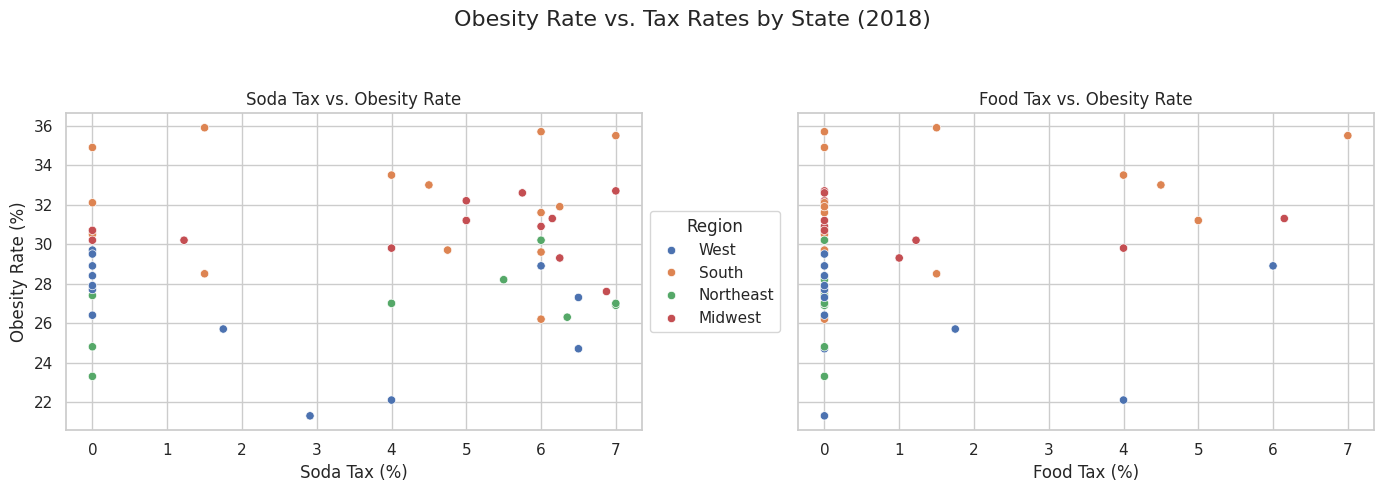

Soda Tax vs Obesity Correlation: 0.111
Food Tax vs Obesity Correlation: 0.225


In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#assign states to regions
west= ["AK", "AZ", "CA", "CO", "HI", "ID", "MT", "NV", "NM", "OR", "UT", "WA", "WY"]
northeast= ["CT", "MA", "ME", "NH", "NJ", "NY", "PA", "RI", "VT"]
south= ["AL", "AR", "DC", "DE", "FL", "GA", "KY", "LA", "MD", "MS", "NC", "OK", "SC", "TN", "TX", "VA", "WV"]
midwest= ["IA", "IL", "IN", "KS", "MI", "MN", "MO", "NE", "ND", "OH", "SD", "WI"]

#create a function assign a region to a given state
def assign_region(state):
    if state in west:
        return "West"
    if state in northeast:
        return "Northeast"
    if state in south:
        return "South"
    if state in midwest:
        return "Midwest"

numeric_cols = ['SODATAX_STORES14', 'FOOD_TAX14', 'Obesity_Rate'] #make sure cols are numeric
for col in numeric_cols:
    food_assistance_df[col] = pd.to_numeric(food_assistance_df[col], errors='coerce')

food_assistance_df["Region"] = food_assistance_df["State"].apply(assign_region) #assign regions

#setup the plot
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

#soda Tax vs Obesity
sns.scatterplot(ax=axes[0], data=food_assistance_df, x="SODATAX_STORES14", y="Obesity_Rate", hue="Region")
axes[0].set_title("Soda Tax vs. Obesity Rate")
axes[0].set_xlabel("Soda Tax (%)")
axes[0].set_ylabel("Obesity Rate (%)")

#food Tax vs Obesity
sns.scatterplot(ax=axes[1], data=food_assistance_df, x="FOOD_TAX14", y="Obesity_Rate", hue="Region", legend=False) #to hide second legend
axes[1].set_title("Food Tax vs. Obesity Rate")
axes[1].set_xlabel("Food Tax (%)")
axes[1].set_ylabel("")
axes[0].legend(title="Region", loc='center left', bbox_to_anchor=(1, 0.5))

plt.suptitle("Obesity Rate vs. Tax Rates by State (2018)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

#correlation coefficients
soda_corr = food_assistance_df['Obesity_Rate'].corr(food_assistance_df['SODATAX_STORES14'])
food_corr = food_assistance_df['Obesity_Rate'].corr(food_assistance_df['FOOD_TAX14'])
print(f"Soda Tax vs Obesity Correlation: {soda_corr:.3f}")
print(f"Food Tax vs Obesity Correlation: {food_corr:.3f}")

## ML Analyses

At least two ML analyses on your dataset, along with a baseline comparison and an
interpretation of the result that you obtain. Write the name of the member(s) who is
responsible for it while explaining it


### Analysis 1 (SHIMRA, RASLEEN)
### Decision Tree Analysis


In [72]:
#Decision Tree Statistics

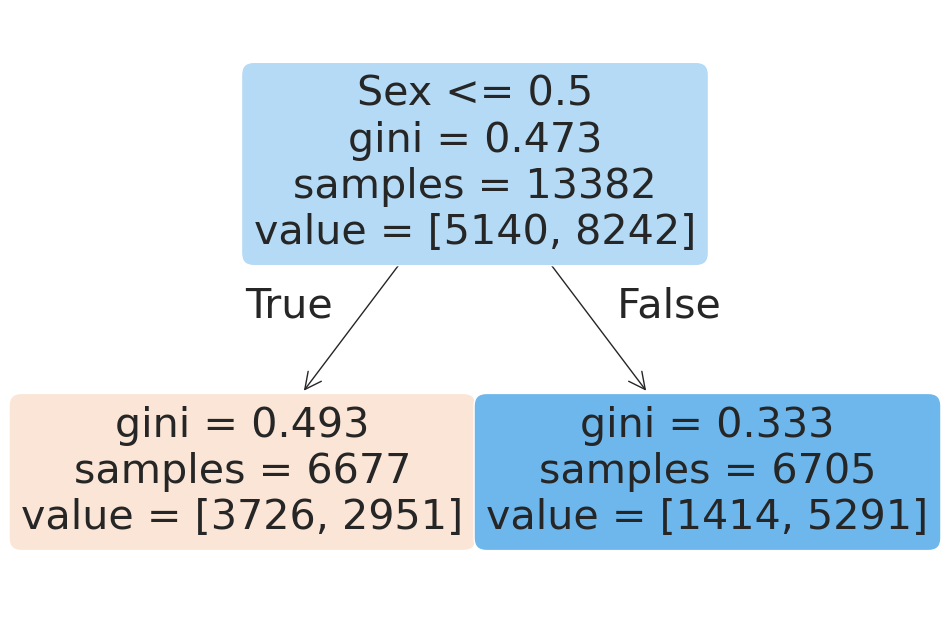

In [73]:
#Decision Tree analysis
threshold = 30  # Example threshold for obesity (you can modify this)
cleaned_df = df_long[
    (df_long['Sex'].isin(['Male', 'Female'])) &  # Keep only valid sex values
    (df_long['Class'] == 'Obesity / Weight Status') &  # Filter for obesity data
    (df_long['Data_Value'].notna())  # Remove rows where Data_Value is NaN
].reset_index(drop=True)

# Convert 'Sex' from categorical to numerical using LabelEncoder
label_encoder = LabelEncoder()
cleaned_df['Sex'] = label_encoder.fit_transform(cleaned_df['Sex'])  # 'Male' -> 0, 'Female' -> 1

# Create a binary 'Obesity_Status' column (Obese vs Non-Obese)
cleaned_df['Obesity_Status'] = cleaned_df['Data_Value'].apply(lambda x: 'Obese' if x > threshold else 'Non-Obese')

# Define features and target for classification
features = ['Sex']  # You can include other features as needed
X = cleaned_df[features]
y = cleaned_df['Obesity_Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree = dtree.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dtree, feature_names=features, filled=True, rounded=True)
plt.show()


In [74]:
# Alternate Decision Tree Analysis
# Using multiple demographics to predict obesity status of individuals

In [75]:
df2.columns = df2.columns.str.strip()
df2['obese'] = df2['Class'].str.contains("Obesity / Weight Status", case = False, na=False).astype(int)
df2.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,Income,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationID1,obese
0,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,NaN,2 or more races,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,RACE2PLUS,1
1,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,NaN,Other,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,RACEOTH,1
2,2011,2011,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,2011.0,Value,...,NaN,NaN,"(64.845079957001, -147.722059036)",PA,PA1,Q044,VALUE,2,FEMALE,0
3,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,NaN,NaN,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,AGEYR3544,1
4,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"$15,000 - $24,999",NaN,"(64.845079957001, -147.722059036)",OWS,OWS1,Q037,VALUE,2,INC1525,1


In [76]:
features = ['Sex', 'Education', 'Income', 'Race/Ethnicity', 'LocationDesc', 'Age(years)']
X= df2[features]
y=df2['obese']

X_encoded = pd.get_dummies(X, drop_first = True)

In [77]:
# Create training and test data sets
# 80% training and 20% testing data

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = .20, random_state=42)

clf = DecisionTreeClassifier(max_depth = 20, random_state = 42, class_weight = 'balanced')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.4
              precision    recall  f1-score   support

           0       0.55      0.20      0.29     13010
           1       0.36      0.73      0.48      7845

    accuracy                           0.40     20855
   macro avg       0.45      0.47      0.39     20855
weighted avg       0.48      0.40      0.36     20855



In [78]:
# The accuracy is not bad, at an accuray rate of 60%. This means that the model is correctly predicting whether a certain individual is obese or not based on the demographics and it's doing it correctly 60% of the time.

In [79]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators = 100,
    max_depth = None,
    class_weight = 'balanced',
    random_state=42
)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.4262766722608487
              precision    recall  f1-score   support

           0       0.55      0.46      0.50     13010
           1       0.29      0.38      0.33      7845

    accuracy                           0.43     20855
   macro avg       0.42      0.42      0.41     20855
weighted avg       0.45      0.43      0.44     20855



### Analysis 2 (KYLA)

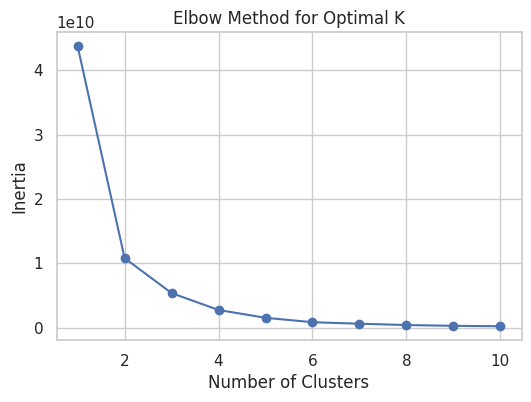

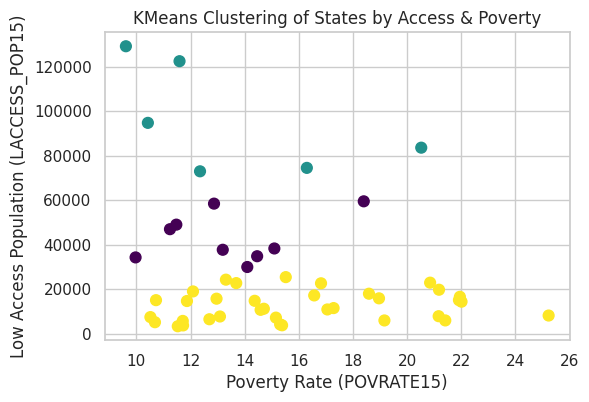

<ipython-input-87-07b89d9062f8>:52: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




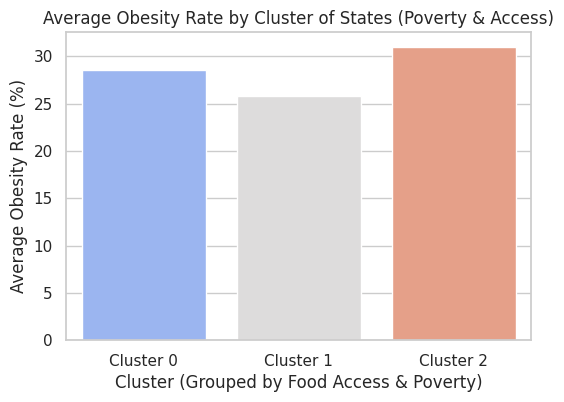

In [87]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# How does obesity vary after grouping states by food access and poverty

access_vars = ["POVRATE15","LACCESS_POP15"]
fa_ml2_df = main_df[main_df['Variable_Code'].isin(access_vars)]

# Get state level data by taking the mean across counties
fa_ml2_df = fa_ml2_df.groupby(['State', 'Variable_Code'])['Value'].mean().reset_index()
fa_ml2_df = fa_ml2_df.pivot(index='State', columns='Variable_Code', values='Value').reset_index()
fa_ml2_df = fa_ml2_df[fa_ml2_df['State'] != 'DC'].reset_index(drop=True)
fa_ml2_df

# prep data points
x = fa_ml2_df['POVRATE15'].values
y = fa_ml2_df['LACCESS_POP15'].values
data = list(zip(x, y))

# Elbow Method to find k
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# plot the clusters
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(data)

fa_ml2_df['Cluster'] = kmeans.labels_
obesity_cluster_df = pd.merge(obesity_df, fa_ml2_df[['State', 'Cluster']], left_on='LocationAbbr', right_on='State')
cluster_avg_obesity = obesity_cluster_df.groupby('Cluster')['Obesity_Rate'].mean().reset_index()

plt.figure(figsize=(6, 4))
plt.scatter(x, y, c=kmeans.labels_, cmap='viridis', s=60)
plt.xlabel('Poverty Rate (POVRATE15)')
plt.ylabel('Low Access Population (LACCESS_POP15)')
plt.title('KMeans Clustering of States by Access & Poverty')
plt.show()


plt.figure(figsize=(6, 4))
sns.barplot(data=cluster_avg_obesity, x='Cluster', y='Obesity_Rate', palette='coolwarm')
plt.title("Average Obesity Rate by Cluster of States (Poverty & Access)")
plt.xlabel("Cluster (Grouped by Food Access & Poverty)")
plt.ylabel("Average Obesity Rate (%)")
plt.xticks([0, 1, 2], ["Cluster 0", "Cluster 1", "Cluster 2"])
plt.show()

Hypothesis: Socioeconomic factors like poverty and access will have a relationship with obesity rates. We think that as poverty rates increase and access rates lower, the obesity rates will increase.

Method: clustering using kmeans

Explanation:
The first ML analysis that we did used KMeans clustering, and it essentially grouped all of the states in the United States based on the poverty rate and the percentage of the population with lower access (using variables POVRATE15 and LACCESS_POP15). We wanted to see how these variables correlated with the states’ obesity rates. We decided to use k=3 for the clusters using the elbow method, and we separated the states into these clusters based on the access and poverty rates.
Now that we know it would be best to use 3 clusters, we can utilize the KMeans graph. The Kmeans graph is an unsupervised ML algorithm that groups data points based on the similarities that they have. So after clustering, we merged the cluster labels with our obesity dataset and calculated the average obesity rate for each cluster.
Our results essentially show that cluster 1 has the lowest average obesity rate, and cluster 2 and cluster 0 had higher average obesity rates, with cluster 2 being the highest. This shows that a cluster that had the lowest access and the highest data for poverty had the highest obesity rate.

Therefore, our analysis through these ML graphs supports our overall hypothesis that socioeconomic factors play a very important role in obesity.

Fariha's ML ANALYSIS:
I wanted to build an ML model that use logtstic regression to hopefully classify the obesity rate on whetehr it is high or not based on the number of superstores per 1000 in 2016. I found that my model had a very high accuracy of 0.9, which is very high. This means that the number of superstores per 1000 in 2016 could be a good variable used for prediction for high obesity rate using a linear regression model.  Howveer, it is important to acknowledge the limitations of this model, because we are working with state level data and there are 50 states, it may be over fitting because of a lack of enough data.

In [90]:
#LOGISTIC REGRESSION/SVM
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

#filter the obesity data set to look at the percent of adults who had obesite in the year 2016
obesity_df = df_long[
    (df_long['YearStart'] == 2016) &
    (df_long['Question'] == 'Percent of adults aged 18 years and older who have obesity') &
    (df_long['StratificationID1'].str.strip() == "OVERALL") &
    (df_long['Total'] == 'Total') &
    (df_long['Value'] == 'BRFSS')
].reset_index(drop=True)

# exclude the values of other US territories, focusing only on the states, and update the data frame with teh obesity data
excluded = ['National', 'District of Columbia', 'Guam', 'Puerto Rico', 'Virgin Islands']
obesity_df = obesity_df[~obesity_df['LocationDesc'].isin(excluded)].reset_index(drop=True)
obesity_df = obesity_df[['YearStart', 'LocationAbbr', 'LocationDesc', 'Data_Value']]
obesity_df.rename(columns={'Data_Value': 'Obesity_Rate'}, inplace=True)

# look at the data only for the the rec facilities per thousand in 2016 and group by the state data from counties
rf_df = main_df[main_df['Variable_Code'] == "SUPERCPTH16"]
rf_state = rf_df.groupby(['State', 'Variable_Code'])['Value'].mean().reset_index()
rf_state = rf_state.pivot(index='State', columns='Variable_Code', values='Value').reset_index()
rf_state = rf_state[rf_state['State'] != 'DC'].reset_index(drop=True)
#print(rf_state)

#merge bothe the obesity data and make sure all of teh columns that we are left with are numeric
superstore_df = obesity_df.merge(rf_state, left_on="LocationAbbr", right_on="State", how="inner")

# add in a column classifying something as having high obesity (1) if it is higher than the average obesity
average_obesity = superstore_df['Obesity_Rate']. median()
superstore_df['High Obesity'] = (superstore_df['Obesity_Rate'] > average_obesity).astype(int)
print(rfacility_df)

# separate the X and y into the variables you want to use to predict and what you want to predict
X = superstore_df[['Obesity_Rate', 'SUPERCPTH16']]
y = superstore_df['High Obesity']

#split the test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

#scale because of the difference in rates
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# use logistic regression model
log_regression_model = LogisticRegression()
log_regression_model.fit(X_train, y_train)

# get the predictions, to measure the accuracy based on the test data
highPredictions = log_regression_model.predict(X_test)

# print out the accuracy and classification report
print("Accuracy: ", accuracy_score(y_test, highPredictions))
print(classification_report(y_test, highPredictions))


    YearStart LocationAbbr    LocationDesc  Obesity_Rate State  RECFACPTH16  \
0        2016           AK          Alaska          31.4    AK     0.053022   
1        2016           AL         Alabama          35.7    AL     0.049532   
2        2016           AR        Arkansas          35.7    AR     0.048270   
3        2016           AZ         Arizona          29.0    AZ     0.051039   
4        2016           CA      California          25.0    CA     0.093669   
5        2016           CO        Colorado          22.3    CO     0.076026   
6        2016           CT     Connecticut          26.0    CT     0.138244   
7        2016           DE        Delaware          30.7    DE     0.131132   
8        2016           FL         Florida          27.4    FL     0.074932   
9        2016           GA         Georgia          31.4    GA     0.050215   
10       2016           HI          Hawaii          23.8    HI     0.057451   
11       2016           IA            Iowa          

Fatimah's ML Analysis: I wanted to explore the relationship between income level and obesity rates so I chose to do my ML analysis using linear regression. I filtered the BRFSS dataset to include only the data points with responses related to adult obesity and grouped the data by income brackets (which were predefined in the dataset). To improve the models performance and to avoid overfitting, I chose to plot all individual data points rather than combining the averages to give the regression model more data to learn from. I split the dataset into training and testing subsets to evaluate better. The regression analysis showed a clear positive correlation and as income levels decrease, obesity rates seem to increase. This shows that lower income populations are affected more by obesity probably because of factors such as limited access to healthy food or healthcare. The model's R^2 score on the test data shows a moderate fit and confirms a measurable linear trend between income and obesity.

Model Coefficient (slope): 1.240
Model Intercept: 29.553
R² on test data: 0.138
Mean Squared Error: 26.224


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



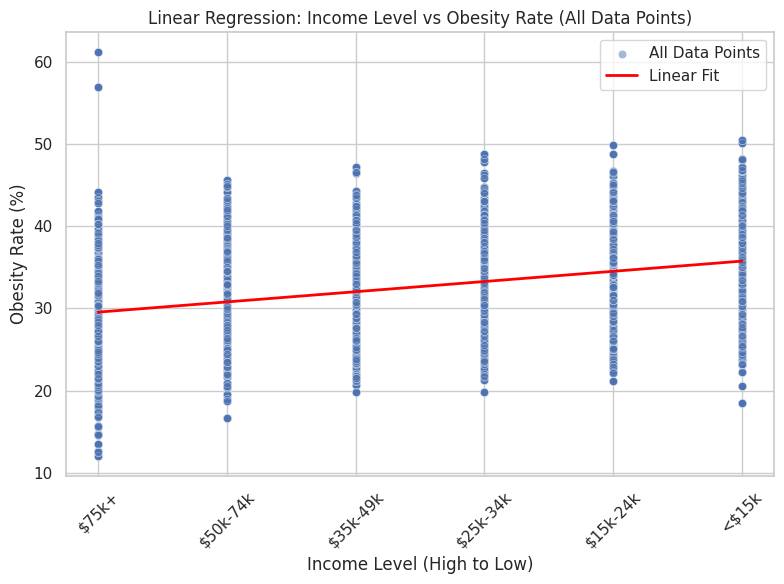

In [91]:
# Fatimah's ML Analysis
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

income_order = { #this is the numeric order
    "$75,000 or greater": 0,
    "$50,000 - $74,999": 1,
    "$35,000 - $49,999": 2,
    "$25,000 - $34,999": 3,
    "$15,000 - $24,999": 4,
    "Less than $15,000": 5
}

#get all individual data points
obesity_df = df_long[(df_long['Question'] == 'Percent of adults aged 18 years and older who have obesity') & (df_long['Income'].isin(income_order.keys())) & (df_long['Data_Value'].notna())].copy()
obesity_df['IncomeOrder'] = obesity_df['Income'].map(income_order) #add numeric income level

#pPrepare data for regression
X = obesity_df[['IncomeOrder']]
y = obesity_df['Data_Value']

#train/test split for model eval
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train the regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

#predict and get evaluation calculations
y_pred = linreg.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Model Coefficient (slope): {linreg.coef_[0]:.3f}")
print(f"Model Intercept: {linreg.intercept_:.3f}")
print(f"R² on test data: {r2:.3f}")
print(f"Mean Squared Error: {mse:.3f}")

#visualize
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['IncomeOrder'], y=y, alpha=0.5, label='All Data Points')
plt.plot(sorted(X['IncomeOrder'].unique()), linreg.predict(np.array(sorted(X['IncomeOrder'].unique())).reshape(-1,1)), color='red', linewidth=2, label='Linear Fit')

plt.xticks(ticks=range(6), labels=[
    "$75k+",
    "$50k-74k",
    "$35k-49k",
    "$25k-34k",
    "$15k-24k",
    "<$15k"
], rotation=45)

plt.title('Linear Regression: Income Level vs Obesity Rate (All Data Points)')
plt.xlabel('Income Level (High to Low)')
plt.ylabel('Obesity Rate (%)')
plt.legend()
plt.tight_layout()
plt.show()

## Reflection

a discussion on the following aspects:
* What is the most challenging part of the project that you’ve encountered so far? (Kyla)<br><br>
  Both the Food Atlas dataset and the BRFSS dataset contain information about certain variables on a state level, but upon further inspection we discovered that most of the variable values in Food Atlas dataset were percentages at county level. This presented a challenge because we needed to take additional steps to prepare to perform a table join by state in order to find meaningful correlations.<br><br>
  Additionally, The Food Atlas variables offers specific variable data at particular years, while the BFRSS data provides values for every variable throughout every year. We had to carefully select which variables to compare in our visualizations so that any trends in the data won't be influenced by the discrepancy in the measurement years.<br><br>

* What are your initial insights? (Rasleen) <br><br>
  Our initial insights are that we can see there are correlations between certain demographics and obesity rates. Whether they be higher for a certain demographic or lower. For certain demographics, we can infer why the rates might be higher or lower based on context clues. For instance, places that have a recreational center closer to their homes have a lower rate of obesity than others because those people have access to a place where they can exercise and reduce the risk of obesity. If there is accessibility for the general people to be able to work on their fitness, then obesity levels will be down. But in the cases, such as sex, male vs. female. We would have to research some more into why a certain sex is prone to higher rates of obesity than the other. Is there a specific gene? Can we make inferences since this demographic is so broad? This is something that we would have to research more and analyze more data points to make a logical inference about.<br><br>

* Are there any concrete results you can show at this point? If not, why not?Going forward, what are the current biggest problems you’re facing? (Fariha)<br><br>

  At this moment in time, we have some concrete data. We are still in the proccess of exploring different hypothesis with data and exploring different correlations amongst variables. We ave seen some concrete data for income levels for example, where we see that as income levels get higher, the percent obesity rate per income level tends to decrease. However, the percent findings we are seeing are relatively similar in that there is only about a 7% difference in the obesity rate percentage from the highest income level to the lowest. Thus, we can see a different, but we can also acknowledge that it is also not huge. This pattern tends to continue throughout our data; for example, we can also see this with the obesity rate based on gender graph where the obesity rate for men is higher that the obesity rate for women, but this again, is not a huge difference. A problem that we have been facing is the fact that we have a lot of data looking at many important factors; however, those factors tend to be grouped by random varying years. The issue is that sometimes these years are very spread apart for when the data is collected, and we often face issues in trying to determine whihc data set to use, if we should use the most recent or the ones with the greatest change, etc. In addition to this, we have also somewhat struggled with making sure that our data sets actually have to have enough information for a specific data point for us to be using throughout.

* Do you think you are on track with your project? If not, what parts do you need to dedicate more time to? (Shimra)<br><br>
  
  Yes, we believe that we are on-track with our project. We explored the dataset in multiple ways, using various visualizations to understand it. We also plotted our data to get a better understanding on how each demographic correlate to one another and also our label. We also used ML techniques to model our hypotheses and we found multiple interesting results. For example: we found that on average, males are likely to be obese than females. But this is just by analyzing the sex feature. To explore other features, we visualized our data by combining multiple demographics like income, sex, accessibility of food, and more. Overall, we are on track with our project and looking forward to gaining even more insights.
  <br><br>

* Given your initial exploration of the data, is it worth proceeding with your project, why? If not, how will you move forward (method, data etc)? (Fatimah) <br><br>

  After exploring the data in our two data sets through our visualizations and analysis, our group has decided that it is a project that is worth proceeding with. Looking at the visualizations, there are useful correlations that can be extracted and analyzed to help fight obesity in the United States. One such visualization would be the horizontal bar chart comparing the rate of obesity to the income levels. This graph supports our hypothesis and shows that as income levels decrease, the rate of obesity increases. This connection gives grounds to explore solutions for the problem that our project is focused on. Other than income, our group also looked at other factors like education, gender, food assistance participation, and access to recreational facilities like gyms. Each of the hypothesis's helped us uncover trends that we could continue to expand on. Going forward, our group may try to focus on looking into data accross the world rather than focusing only on the United States. This may help us notice similar patterns and could broaden our view and data. However, I think our group is at a good pace and will continue to follow our original plan of focusing on just the United States. <br><br>
  

## Next Steps (FARIHA)

Our concrete goals and plans for the next month is for us to continue on the track we are currently going on. At this moment in time, we as a group feel that we are in a good headspace in terms of dividing up the project work evenly and working on it as we continue on. We each have one visualization done based on a topic that we wanted to explore, and we have to work on the visualizations and the ML diagrams for our topics. We set a deadline for ourselves so that we finish our visualiations by April 15th, 2025, and we aim to have each of our ML diagrams completed by April 20th. Throughout this period, we will each make sure we are around to help eachother, and we will make sure to communicate our progress throughout. In addition to this, we aim to have the final report and presentation done by the 26th, allowing us to have ample time to practice for our presentation. By this point, we will be putting in the finishing touches for the final project and completing our reports while including the data and necessary results regarding the analysis by May 4. Our goal is to to hopefully submit before finals week begins!
